In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jb

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle
import os
import json
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
!pip install XGBoost
!pip install xgboost
!pip install joblib

In [6]:
df = pd.read_csv('D:\Content_Monetization\youtube_ad_revenue_dataset.csv')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [8]:
df.describe()

views          likes       comments  watch_time_minutes  \
count  122400.000000  116283.000000  116288.000000       116295.000000   
mean     9999.856283    1099.633618     274.396636        37543.827721   
std        99.881260     519.424089     129.741739        12987.724246   
min      9521.000000     195.000000      48.000000        14659.105562   
25%      9933.000000     650.000000     162.000000        26366.320569   
50%     10000.000000    1103.000000     274.000000        37531.990337   
75%     10067.000000    1547.000000     387.000000        48777.782090   
max     10468.000000    2061.000000     515.000000        61557.670089   

       video_length_minutes    subscribers  ad_revenue_usd  
count         122400.000000  122400.000000   122400.000000  
mean              16.014165  502191.719902      252.727210  
std                8.083790  288397.470103       61.957052  
min                2.000142    1005.000000      126.590603  
25%                9.004695  252507.500000      199.902018  
50%               16.005906  503465.500000      252.749699  
75%               23.021260  752192.000000      305.597518  
max               29.999799  999997.000000      382.768254

In [9]:
df.drop_duplicates()


video_id                        date  views   likes  comments  \
0       vid_3092  2024-09-24 10:50:40.993199   9936  1221.0     320.0   
1       vid_3459  2024-09-22 10:50:40.993199  10017   642.0     346.0   
2       vid_4784  2024-11-21 10:50:40.993199  10097  1979.0     187.0   
3       vid_4078  2025-01-28 10:50:40.993199  10034  1191.0     242.0   
4       vid_3522  2025-04-28 10:50:40.993199   9889  1858.0     477.0   
...          ...                         ...    ...     ...       ...   
122395  vid_2902  2024-12-14 10:50:40.993199   9853  1673.0     147.0   
122396  vid_3890  2024-07-13 10:50:40.993199  10128  1709.0      63.0   
122397  vid_3934  2024-06-10 10:50:40.993199  10267   700.0       NaN   
122398  vid_4260  2024-12-22 10:50:40.993199  10240  1616.0     106.0   
122399  vid_1056  2024-06-25 10:50:40.993199   9931   770.0       NaN   

        watch_time_minutes  video_length_minutes  subscribers       category  \
0             26497.214184              2.862137       228086  Entertainment   
1             15209.747445             23.738069       736015         Gaming   
2             57332.658498             26.200634       240534      Education   
3             31334.517771             11.770340       434482  Entertainment   
4             15665.666434              6.635854        42030      Education   
...                    ...                   ...          ...            ...   
122395        42075.704885             25.490195       210818      Education   
122396        57563.703040             16.229133       878860          Music   
122397        27549.714659             23.822365       576756           Tech   
122398        56967.384382              7.753099       585138          Music   
122399        38466.837135             27.305703       517587           Tech   

         device country  ad_revenue_usd  
0            TV      IN      203.178237  
1        Tablet      CA      140.880508  
2            TV      CA      360.134008  
3        Mobile      UK      224.638261  
4        Mobile      CA      165.514388  
...         ...     ...             ...  
122395   Tablet      US      280.986396  
122396  Desktop      UK      354.612981  
122397   Tablet      CA      203.643106  
122398   Mobile      UK      351.525811  
122399       TV      CA      253.842824  

[120000 rows x 12 columns]

In [10]:
df.isna().sum()


video_id                   0
date                       0
views                      0
likes                   6117
comments                6112
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [11]:
df['likes'].fillna(df['likes'].median(), inplace=True)
df['comments'].fillna(df['comments'].median(), inplace=True)
df['watch_time_minutes'].fillna(df['watch_time_minutes'].median(), inplace=True)

In [12]:
df.isnull().sum()


video_id                0
date                    0
views                   0
likes                   0
comments                0
watch_time_minutes      0
video_length_minutes    0
subscribers             0
category                0
device                  0
country                 0
ad_revenue_usd          0
dtype: int64

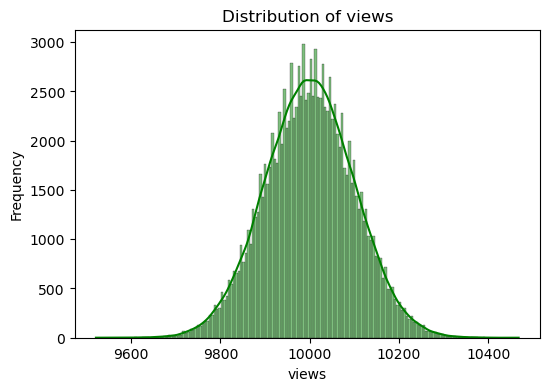


Insights for views:
- views ranges between 9521.00 and 10468.00, mean = 9999.86.
- Median = 10000.00, Std Dev = 99.88.
- views is approximately symmetric (low skewness).
- views distribution is platykurtic (flatter).


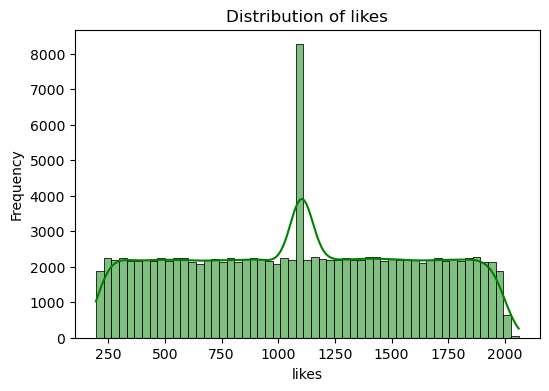


Insights for likes:
- likes ranges between 195.00 and 2061.00, mean = 1099.80.
- Median = 1103.00, Std Dev = 506.28.
- likes is approximately symmetric (low skewness).
- likes distribution is platykurtic (flatter).


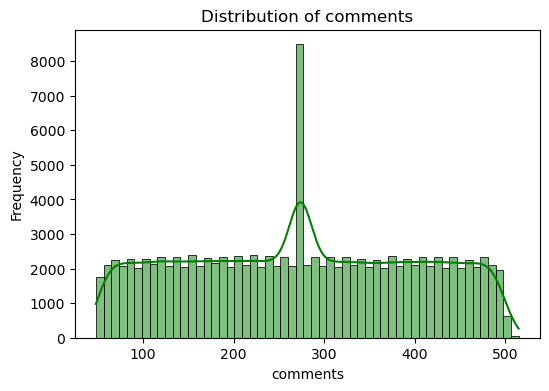


Insights for comments:
- comments ranges between 48.00 and 515.00, mean = 274.38.
- Median = 274.00, Std Dev = 126.46.
- comments is approximately symmetric (low skewness).
- comments distribution is platykurtic (flatter).


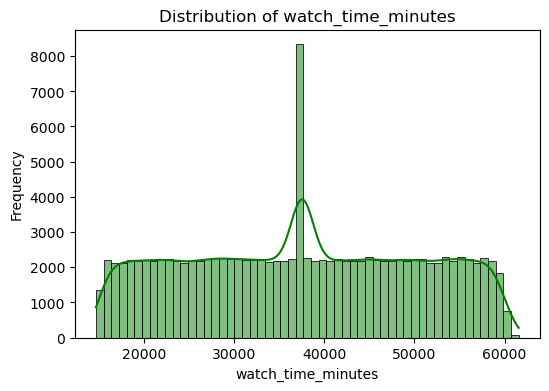


Insights for watch_time_minutes:
- watch_time_minutes ranges between 14659.11 and 61557.67, mean = 37543.24.
- Median = 37531.99, Std Dev = 12659.68.
- watch_time_minutes is approximately symmetric (low skewness).
- watch_time_minutes distribution is platykurtic (flatter).


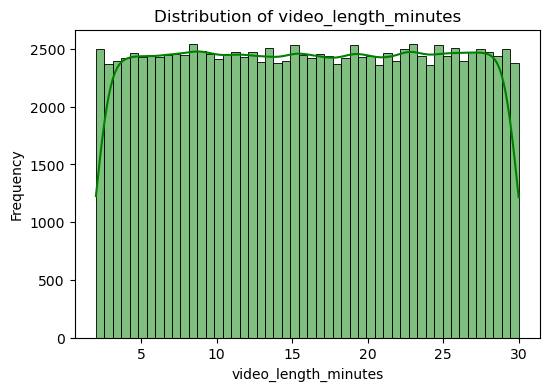


Insights for video_length_minutes:
- video_length_minutes ranges between 2.00 and 30.00, mean = 16.01.
- Median = 16.01, Std Dev = 8.08.
- video_length_minutes is approximately symmetric (low skewness).
- video_length_minutes distribution is platykurtic (flatter).


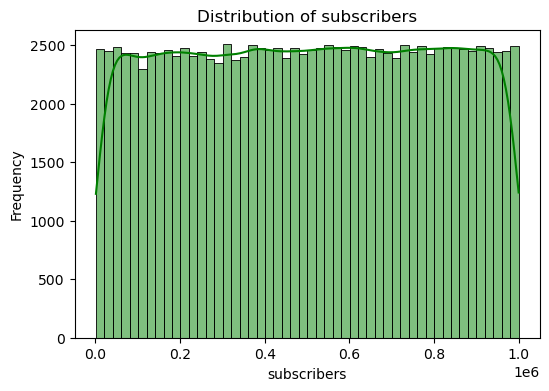


Insights for subscribers:
- subscribers ranges between 1005.00 and 999997.00, mean = 502191.72.
- Median = 503465.50, Std Dev = 288397.47.
- subscribers is approximately symmetric (low skewness).
- subscribers distribution is platykurtic (flatter).


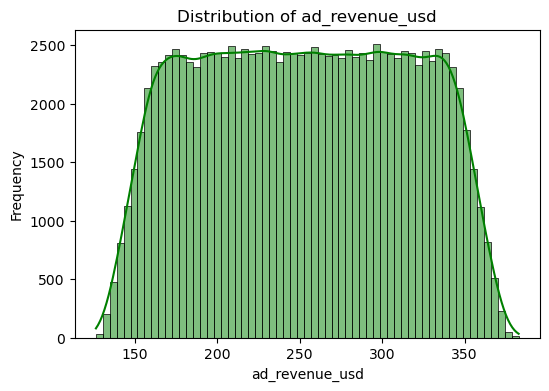


Insights for ad_revenue_usd:
- ad_revenue_usd ranges between 126.59 and 382.77, mean = 252.73.
- Median = 252.75, Std Dev = 61.96.
- ad_revenue_usd is approximately symmetric (low skewness).
- ad_revenue_usd distribution is platykurtic (flatter).


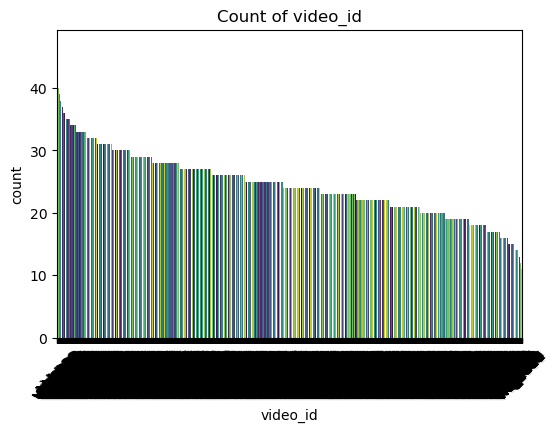


Insights for video_id:
- video_id has 5000 unique categories.
- Most common category is 'vid_3033' with 47 records (0.04%).
- Distribution is highly imbalanced, top category dominates.


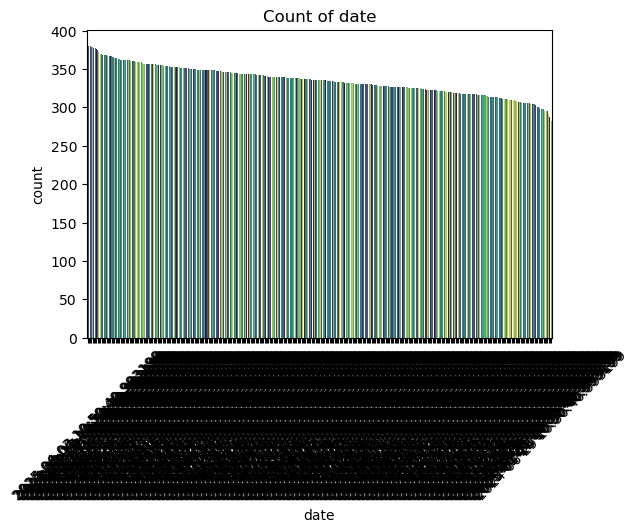


Insights for date:
- date has 365 unique categories.
- Most common category is '2025-04-03 10:50:40.993199' with 382 records (0.31%).
- Distribution is highly imbalanced, top category dominates.


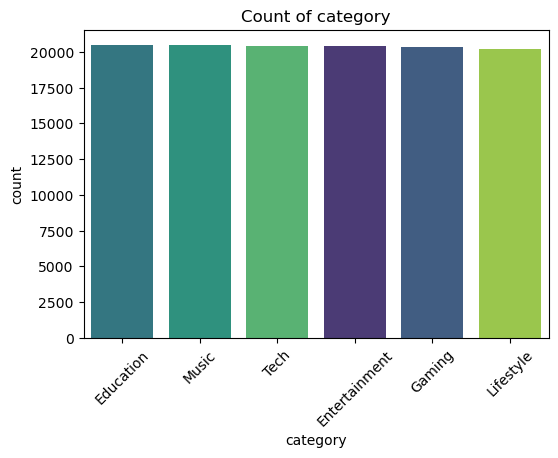


Insights for category:
- category has 6 unique categories.
- Most common category is 'Education' with 20514 records (16.76%).
- Distribution across categories: {'Education': np.int64(20514), 'Music': np.int64(20475), 'Tech': np.int64(20444), 'Entertainment': np.int64(20411), 'Gaming': np.int64(20359), 'Lifestyle': np.int64(20197)}


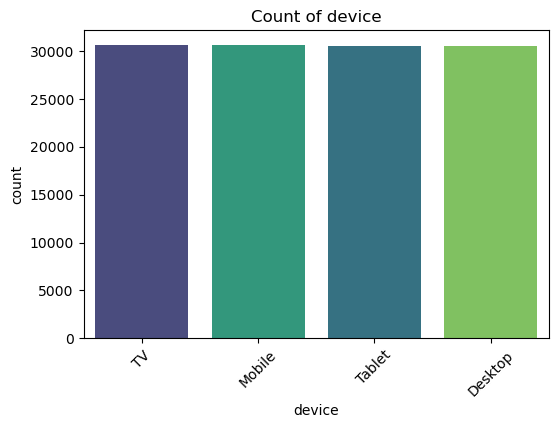


Insights for device:
- device has 4 unique categories.
- Most common category is 'TV' with 30646 records (25.04%).
- Distribution across categories: {'TV': np.int64(30646), 'Mobile': np.int64(30598), 'Tablet': np.int64(30579), 'Desktop': np.int64(30577)}


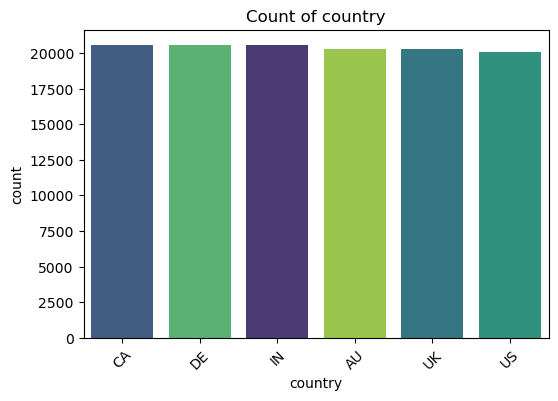


Insights for country:
- country has 6 unique categories.
- Most common category is 'CA' with 20603 records (16.83%).
- Distribution across categories: {'CA': np.int64(20603), 'DE': np.int64(20582), 'IN': np.int64(20564), 'AU': np.int64(20313), 'UK': np.int64(20269), 'US': np.int64(20069)}


{'views': ['- views ranges between 9521.00 and 10468.00, mean = 9999.86.',
  '- Median = 10000.00, Std Dev = 99.88.',
  '- views is approximately symmetric (low skewness).',
  '- views distribution is platykurtic (flatter).'],
 'likes': ['- likes ranges between 195.00 and 2061.00, mean = 1099.80.',
  '- Median = 1103.00, Std Dev = 506.28.',
  '- likes is approximately symmetric (low skewness).',
  '- likes distribution is platykurtic (flatter).'],
 'comments': ['- comments ranges between 48.00 and 515.00, mean = 274.38.',
  '- Median = 274.00, Std Dev = 126.46.',
  '- comments is approximately symmetric (low skewness).',
  '- comments distribution is platykurtic (flatter).'],
 'watch_time_minutes': ['- watch_time_minutes ranges between 14659.11 and 61557.67, mean = 37543.24.',
  '- Median = 37531.99, Std Dev = 12659.68.',
  '- watch_time_minutes is approximately symmetric (low skewness).',
  '- watch_time_minutes distribution is platykurtic (flatter).'],
 'video_length_minutes': ['- vi

In [13]:
# Univariate Analysis function
def univariate_analysis(df):
    """
    Perform univariate analysis:
    - Distribution plots for numeric features + insights
    - Count plots for categorical features + insights
    """

    insights = {}

    # -----------------------
    # 1. Numeric Features
    # -----------------------
    num_features = df.select_dtypes(include=['int64','float64']).columns
    for col in num_features:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], kde=True, color="green")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

        # Insights
        col_desc = df[col].describe()
        skewness = df[col].skew()
        kurtosis = df[col].kurt()
        
        text_insight = []
        text_insight.append(f"- {col} ranges between {col_desc['min']:.2f} and {col_desc['max']:.2f}, mean = {col_desc['mean']:.2f}.")
        text_insight.append(f"- Median = {col_desc['50%']:.2f}, Std Dev = {col_desc['std']:.2f}.")
        if skewness > 1:
            text_insight.append(f"- {col} is highly right-skewed (long tail on right).")
        elif skewness < -1:
            text_insight.append(f"- {col} is highly left-skewed (long tail on left).")
        else:
            text_insight.append(f"- {col} is approximately symmetric (low skewness).")
        if kurtosis > 3:
            text_insight.append(f"- {col} distribution is leptokurtic (peaked).")
        elif kurtosis < 3:
            text_insight.append(f"- {col} distribution is platykurtic (flatter).")
        else:
            text_insight.append(f"- {col} distribution is mesokurtic (normal-like).")

        insights[col] = text_insight
        print(f"\nInsights for {col}:")
        for line in text_insight:
            print(line)

    # -----------------------
    # 2. Categorical Features
    # -----------------------
    cat_features = df.select_dtypes(include=['object','category']).columns
    for col in cat_features:
        plt.figure(figsize=(6,4))
        sns.countplot(
            data=df, 
            x=col, 
            order=df[col].value_counts().index, 
            hue=col,            
            dodge=False,        
            legend=False,       
            palette="viridis"
        )
        plt.xticks(rotation=45)
        plt.title(f"Count of {col}")
        plt.show()

        # Insights
        counts = df[col].value_counts()
        mode_val = counts.index[0]
        text_insight = []
        text_insight.append(f"- {col} has {df[col].nunique()} unique categories.")
        text_insight.append(f"- Most common category is '{mode_val}' with {counts.iloc[0]} records ({counts.iloc[0]/len(df)*100:.2f}%).")
        if df[col].nunique() <= 10:
            text_insight.append(f"- Distribution across categories: {dict(counts)}")
        else:
            text_insight.append(f"- Distribution is highly imbalanced, top category dominates.")

        insights[col] = text_insight
        print(f"\nInsights for {col}:")
        for line in text_insight:
            print(line)

    return insights


# Running univariate analysis                   
uni_results = univariate_analysis(df)
uni_results

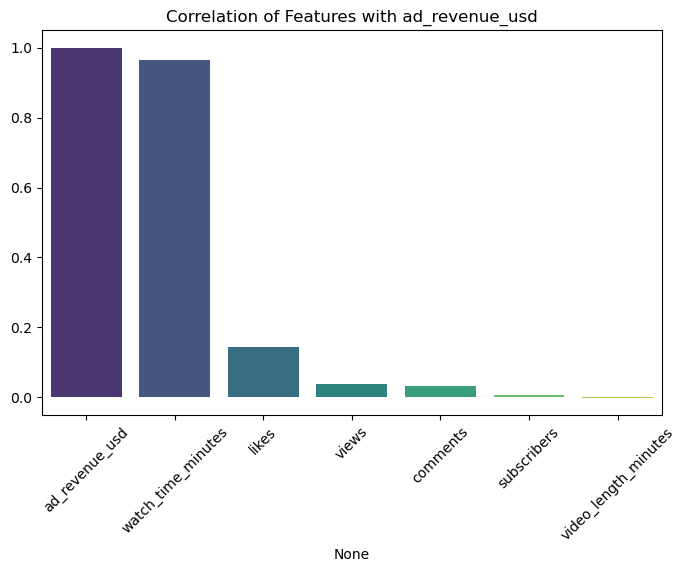


 Correlation Insights:
- watch_time_minutes has a **strong correlation** (0.96) with ad_revenue_usd.
- likes has a **weak correlation** (0.14) with ad_revenue_usd.
- views has a **weak correlation** (0.04) with ad_revenue_usd.
- comments has a **weak correlation** (0.03) with ad_revenue_usd.
- subscribers has a **weak correlation** (0.01) with ad_revenue_usd.
- video_length_minutes has a **weak correlation** (-0.00) with ad_revenue_usd.


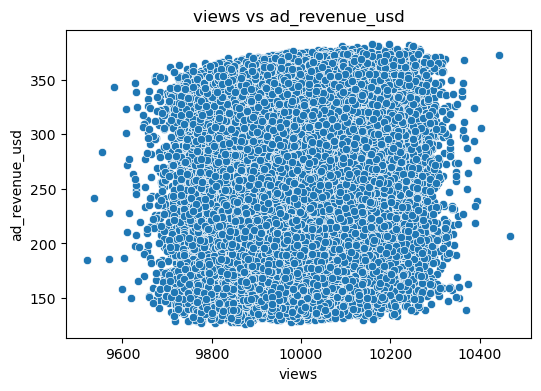

🔹 views has little to no clear linear relationship with ad_revenue_usd.


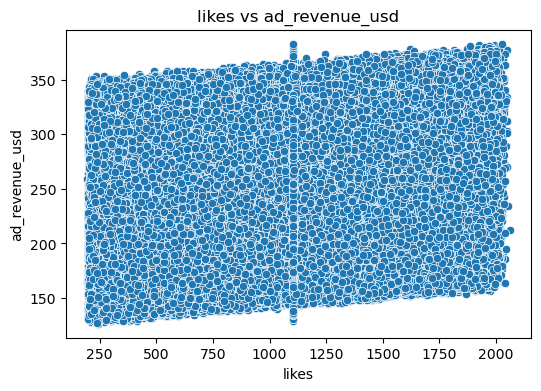

🔹 likes has little to no clear linear relationship with ad_revenue_usd.


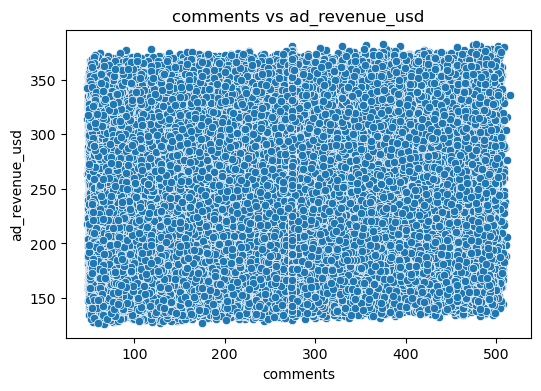

🔹 comments has little to no clear linear relationship with ad_revenue_usd.


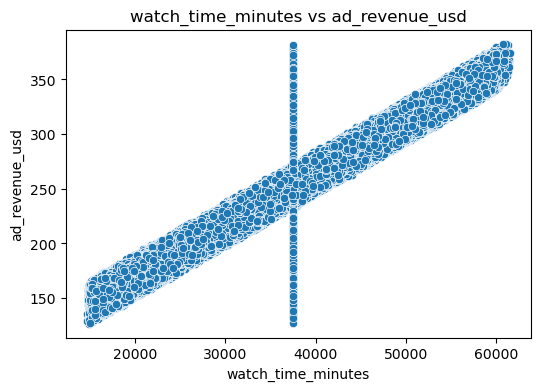

🔹 watch_time_minutes shows a positive relationship with ad_revenue_usd.


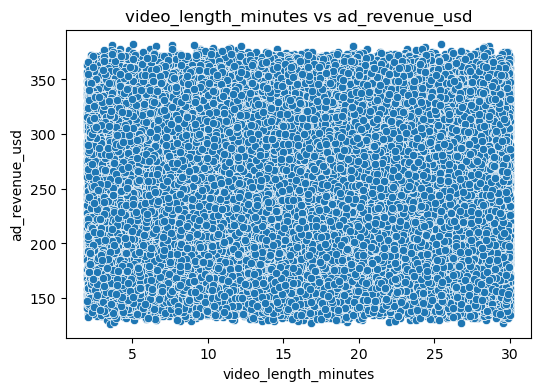

🔹 video_length_minutes has little to no clear linear relationship with ad_revenue_usd.


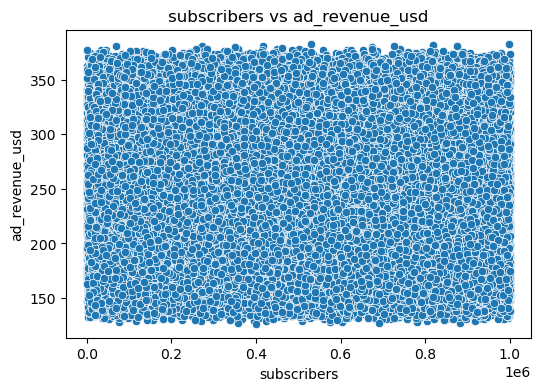

🔹 subscribers has little to no clear linear relationship with ad_revenue_usd.


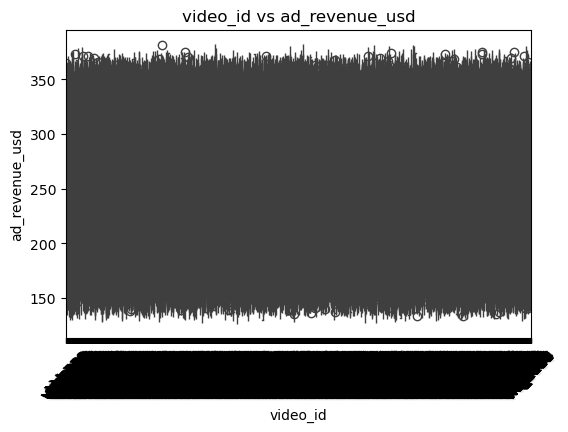

🔹 In video_id, 'vid_4137' category has the highest average ad_revenue_usd (312.26).


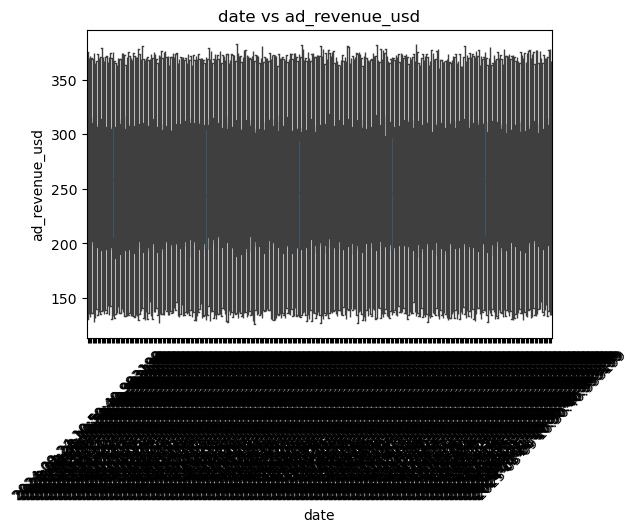

🔹 In date, '2024-11-22 10:50:40.993199' category has the highest average ad_revenue_usd (263.64).


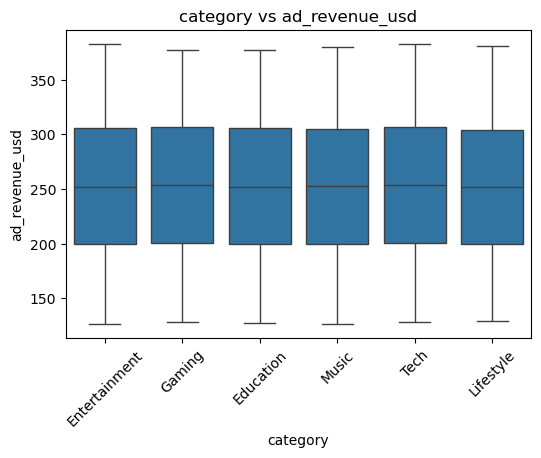

🔹 In category, 'Gaming' category has the highest average ad_revenue_usd (253.51).


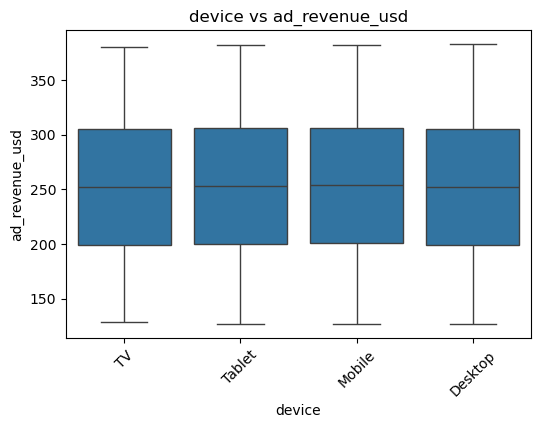

🔹 In device, 'Mobile' category has the highest average ad_revenue_usd (253.28).


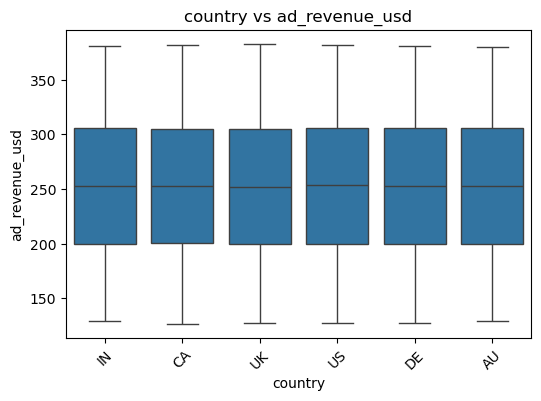

🔹 In country, 'US' category has the highest average ad_revenue_usd (253.22).


{'Correlation': ['- watch_time_minutes has a **strong correlation** (0.96) with ad_revenue_usd.',
  '- likes has a **weak correlation** (0.14) with ad_revenue_usd.',
  '- views has a **weak correlation** (0.04) with ad_revenue_usd.',
  '- comments has a **weak correlation** (0.03) with ad_revenue_usd.',
  '- subscribers has a **weak correlation** (0.01) with ad_revenue_usd.',
  '- video_length_minutes has a **weak correlation** (-0.00) with ad_revenue_usd.']}

In [15]:
# Bivariate Analysis - Correlation, Scatterplots, Boxplots with Insights
def bivariate_analysis(df, target_col="ad_revenue_usd"):
    """
    Perform bivariate analysis with insights:
    - Correlation heatmap for numeric variables
    - Scatterplots for numeric features vs. target
    - Boxplots for categorical features vs. target
    """

    insights = {}

    # -----------------------
    # 1. Correlation with Target
    # -----------------------
    corr = df.corr(numeric_only=True)[target_col].sort_values(ascending=False)
    plt.figure(figsize=(8,5))
    sns.barplot(x=corr.index, y=corr.values, hue=corr.index, palette="viridis", legend=False)
    plt.xticks(rotation=45)
    plt.title(f"Correlation of Features with {target_col}")
    plt.show()

    corr_insights = []
    for feature, value in corr.items():
        if feature != target_col:
            if abs(value) > 0.7:
                corr_insights.append(f"- {feature} has a **strong correlation** ({value:.2f}) with {target_col}.")
            elif abs(value) > 0.3:
                corr_insights.append(f"- {feature} has a **moderate correlation** ({value:.2f}) with {target_col}.")
            else:
                corr_insights.append(f"- {feature} has a **weak correlation** ({value:.2f}) with {target_col}.")
    insights["Correlation"] = corr_insights
    print("\n Correlation Insights:")
    for line in corr_insights:
        print(line)

    # -----------------------
    # 2. Numeric Features vs Target (Scatterplots)
    # -----------------------
    num_features = df.select_dtypes(include=['int64','float64']).columns.drop(target_col)
    for col in num_features:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df[target_col])
        plt.title(f"{col} vs {target_col}")
        plt.show()

        # Scatterplot insights
        if df[col].corr(df[target_col]) > 0.3:
            print(f"🔹 {col} shows a positive relationship with {target_col}.")
        elif df[col].corr(df[target_col]) < -0.3:
            print(f"🔹 {col} shows a negative relationship with {target_col}.")
        else:
            print(f"🔹 {col} has little to no clear linear relationship with {target_col}.")

    # -----------------------
    # 3. Categorical Features vs Target (Boxplots)
    # -----------------------
    cat_features = df.select_dtypes(include=['object','category']).columns
    for col in cat_features:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[col], y=df[target_col])
        plt.xticks(rotation=45)
        plt.title(f"{col} vs {target_col}")
        plt.show()

        # Boxplot insights
        group_means = df.groupby(col)[target_col].mean().sort_values(ascending=False)
        top_cat = group_means.index[0]
        print(f"🔹 In {col}, '{top_cat}' category has the highest average {target_col} ({group_means.iloc[0]:.2f}).")

    return insights

# Run analysis
bivariate_insights = bivariate_analysis(df)
bivariate_insights

<Figure size 1200x1000 with 0 Axes>

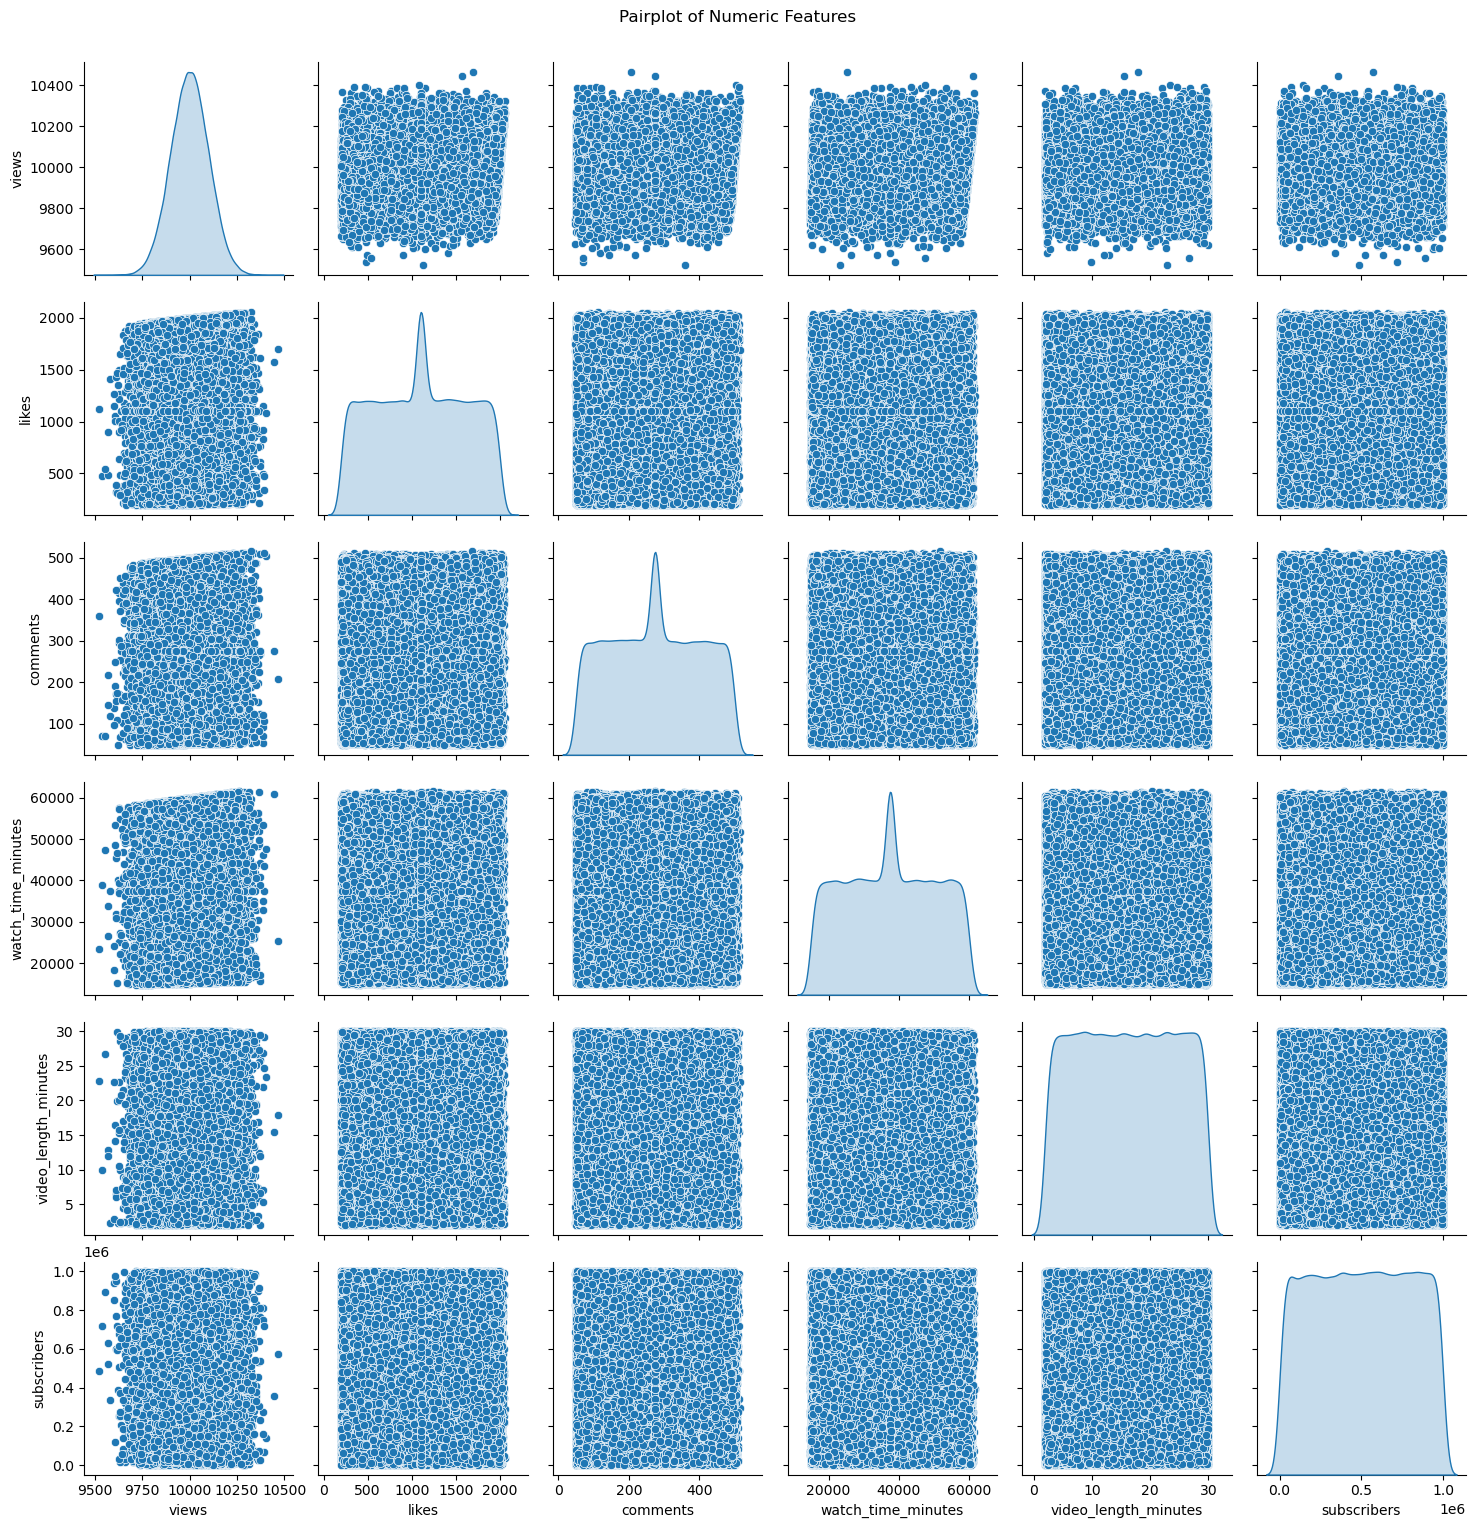


 Pairplot Insights:
- Strong clusters may indicate grouping effects.
- Overlaps between categories may show less predictive power.
- Diagonal density plots reveal skewness & outliers.
- Colors represent different video_id categories.
- Look for separation between video_id groups.


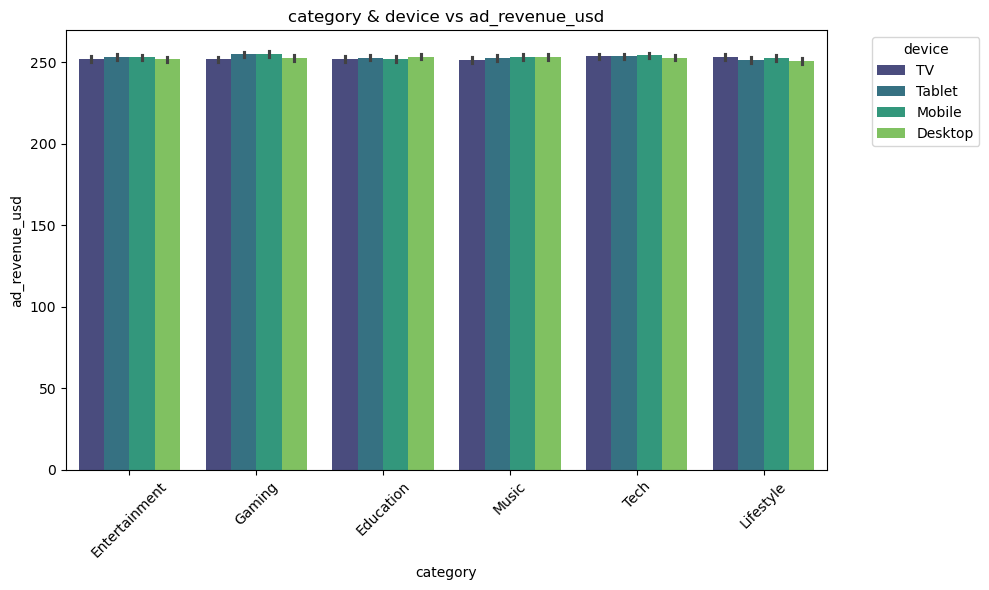


 Grouped Analysis Insights:
 Best combination: category='Gaming' & device='Mobile' (avg ad_revenue_usd: 255.04)
 Worst combination: category='Lifestyle' & device='Desktop' (avg ad_revenue_usd: 250.70)
 Range between best and worst: 4.34
 **Weak interaction effect** between category and device


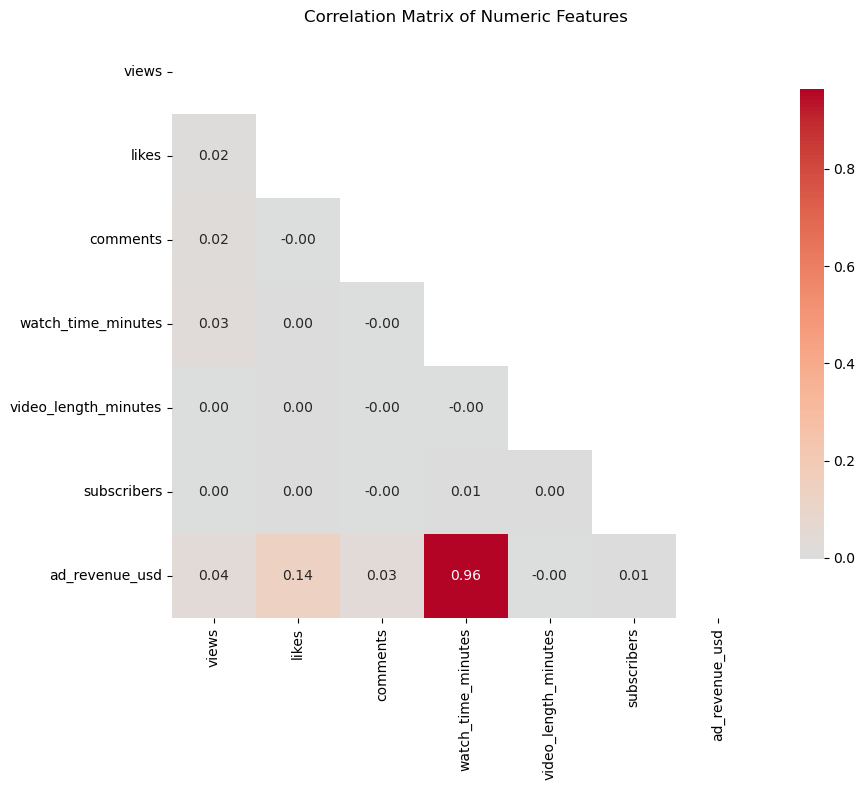


 Feature Correlation Insights:
🔹 Features most correlated with ad_revenue_usd:
  - watch_time_minutes: 0.964
  - likes: 0.143
  - views: 0.038
 No significant multicollinearity detected


{'Pairplot': ['- Strong clusters may indicate grouping effects.',
  '- Overlaps between categories may show less predictive power.',
  '- Diagonal density plots reveal skewness & outliers.',
  '- Colors represent different video_id categories.',
  '- Look for separation between video_id groups.'],
 'Grouped_Analysis': [" Best combination: category='Gaming' & device='Mobile' (avg ad_revenue_usd: 255.04)",
  " Worst combination: category='Lifestyle' & device='Desktop' (avg ad_revenue_usd: 250.70)",
  ' Range between best and worst: 4.34',
  ' **Weak interaction effect** between category and device'],
 'Feature_Correlations': ['🔹 Features most correlated with ad_revenue_usd:',
  '  - watch_time_minutes: 0.964',
  '  - likes: 0.143',
  '  - views: 0.038',
  ' No significant multicollinearity detected']}

In [16]:
# Multivariate Analysis - Pairplots, Interaction, Grouped Plots
def multivariate_analysis(df, target_col="ad_revenue_usd"):
    """
    Perform multivariate analysis with insights:
    - Pairplot of numeric features with target (colored by top categorical feature)
    - Interaction plots between numeric and categorical features
    - Grouped barplots for categorical vs categorical vs target
    - Print insights after each chart
    """
    
    insights = {}
    
    # -------------------------
    # 1. Pairplot for Numerics
    # -------------------------
    num_features = df.select_dtypes(include=['int64','float64']).columns
    if len(num_features) > 1:
        top_cat = df.select_dtypes(include=['object','category']).columns[0] if len(df.select_dtypes(include=['object','category']).columns) > 0 else None
        
        # Limit features for better visualization
        plot_features = num_features[:6] if len(num_features) > 6 else num_features
        
        plt.figure(figsize=(12, 10))
        if top_cat is not None and df[top_cat].nunique() <= 8:
            sns.pairplot(df[plot_features.tolist() + [top_cat]], 
                        hue=top_cat, diag_kind="kde", palette="viridis")
        else:
            sns.pairplot(df[plot_features], diag_kind="kde", palette="viridis")
        
        plt.suptitle("Pairplot of Numeric Features", y=1.02)
        plt.show()
        
        # Pairplot insights
        pairplot_insights = []
        pairplot_insights.append("- Strong clusters may indicate grouping effects.")
        pairplot_insights.append("- Overlaps between categories may show less predictive power.")
        pairplot_insights.append("- Diagonal density plots reveal skewness & outliers.")
        
        if top_cat is not None:
            pairplot_insights.append(f"- Colors represent different {top_cat} categories.")
            pairplot_insights.append(f"- Look for separation between {top_cat} groups.")
        
        insights["Pairplot"] = pairplot_insights
        print("\n Pairplot Insights:")
        for line in pairplot_insights:
            print(line)
    
    # ------------------------------------
    # 2. Interaction: Numeric vs Target by Category
    # ------------------------------------
    cat_features = df.select_dtypes(include=['object','category']).columns
    num_features_clean = df.select_dtypes(include=['int64','float64']).columns.drop(target_col)
    
    interaction_insights = []
    
    for cat in cat_features[:2]:  # Limit to top 2 categorical features
        if df[cat].nunique() > 10:
            continue  # Skip categories with too many levels
            
        for num in num_features_clean[:4]:  # Limit to top 4 numeric features
            plt.figure(figsize=(8,5))
            sns.scatterplot(x=df[num], y=df[target_col], hue=df[cat], alpha=0.6, palette="viridis")
            plt.title(f"{num} vs {target_col} colored by {cat}")
            plt.show()
            
            # Calculate correlation for each category
            category_correlations = []
            for category in df[cat].unique():
                cat_data = df[df[cat] == category]
                if len(cat_data) > 10:  # Need sufficient data points
                    corr_val = cat_data[num].corr(cat_data[target_col])
                    if not pd.isna(corr_val):
                        category_correlations.append((category, corr_val))
            
            # Interaction insights
            if category_correlations:
                correlations = [corr for _, corr in category_correlations]
                avg_corr = np.mean([abs(corr) for corr in correlations])
                
                if avg_corr > 0.5:
                    interaction_insights.append(f"🔹 {num} vs {target_col} shows **strong interaction** with {cat} (avg |corr|: {avg_corr:.2f})")
                elif avg_corr > 0.3:
                    interaction_insights.append(f"🔹 {num} vs {target_col} shows **moderate interaction** with {cat} (avg |corr|: {avg_corr:.2f})")
                else:
                    interaction_insights.append(f"🔹 {num} vs {target_col} shows **weak interaction** with {cat} (avg |corr|: {avg_corr:.2f})")
                
                # Check for consistent vs divergent trends
                if len(set(np.sign(correlations))) == 1:
                    interaction_insights.append(f"  - All {cat} categories show **consistent trend** direction")
                else:
                    interaction_insights.append(f"  - Different {cat} categories show **divergent trends** (potential interaction effect)")
    
    if interaction_insights:
        insights["Interactions"] = interaction_insights
        print("\n Interaction Insights:")
        for line in interaction_insights:
            print(line)
    
    # -------------------------
    # 3. Grouped Barplots (Cat vs Cat vs Target)
    # -------------------------
    if len(cat_features) >= 2:
        grouped_insights = []
        
        # Select first two categorical features with reasonable number of categories
        selected_cats = []
        for cat in cat_features:
            if df[cat].nunique() <= 8:  # Reasonable number of categories
                selected_cats.append(cat)
            if len(selected_cats) == 2:
                break
        
        if len(selected_cats) >= 2:
            cat1, cat2 = selected_cats[0], selected_cats[1]
            
            plt.figure(figsize=(10,6))
            sns.barplot(x=df[cat1], y=df[target_col], hue=df[cat2], palette="viridis")
            plt.title(f"{cat1} & {cat2} vs {target_col}")
            plt.xticks(rotation=45)
            plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()
            
            # Grouped analysis insights
            grouped_means = df.groupby([cat1, cat2])[target_col].mean()
            overall_mean = df[target_col].mean()
            
            # Find best and worst combinations
            best_combo = grouped_means.idxmax()
            worst_combo = grouped_means.idxmin()
            best_value = grouped_means.max()
            worst_value = grouped_means.min()
            
            grouped_insights.append(f" Best combination: {cat1}='{best_combo[0]}' & {cat2}='{best_combo[1]}' (avg {target_col}: {best_value:.2f})")
            grouped_insights.append(f" Worst combination: {cat1}='{worst_combo[0]}' & {cat2}='{worst_combo[1]}' (avg {target_col}: {worst_value:.2f})")
            grouped_insights.append(f" Range between best and worst: {best_value - worst_value:.2f}")
            
            # Check for interaction effects
            range_ratio = (best_value - worst_value) / overall_mean if overall_mean != 0 else 0
            if range_ratio > 0.5:
                grouped_insights.append(f" **Strong interaction effect** detected between {cat1} and {cat2}")
            elif range_ratio > 0.2:
                grouped_insights.append(f" **Moderate interaction effect** detected between {cat1} and {cat2}")
            else:
                grouped_insights.append(f" **Weak interaction effect** between {cat1} and {cat2}")
            
            # Statistical significance check (simple)
            combination_counts = df.groupby([cat1, cat2]).size()
            min_count = combination_counts.min()
            if min_count < 10:
                grouped_insights.append(f"⚠️ Some combinations have low sample sizes (min: {min_count}). Results may not be reliable.")
            
            insights["Grouped_Analysis"] = grouped_insights
            print("\n Grouped Analysis Insights:")
            for line in grouped_insights:
                print(line)
    
    # -------------------------
    # 4. Feature Importance via Correlation Matrix
    # -------------------------
    if len(num_features) > 2:
        plt.figure(figsize=(10, 8))
        correlation_matrix = df[num_features].corr()
        
        # Create correlation heatmap
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   mask=mask, square=True, fmt='.2f', cbar_kws={"shrink": .8})
        plt.title("Correlation Matrix of Numeric Features")
        plt.tight_layout()
        plt.show()
        
        # Feature correlation insights
        correlation_insights = []
        target_correlations = correlation_matrix[target_col].drop(target_col).abs().sort_values(ascending=False)
        
        correlation_insights.append(f"🔹 Features most correlated with {target_col}:")
        for feature, corr_val in target_correlations.head(3).items():
            correlation_insights.append(f"  - {feature}: {corr_val:.3f}")
        
        # Check for multicollinearity
        high_corr_pairs = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_val = correlation_matrix.iloc[i, j]
                if abs(corr_val) > 0.8:
                    feature1 = correlation_matrix.columns[i]
                    feature2 = correlation_matrix.columns[j]
                    if feature1 != target_col and feature2 != target_col:
                        high_corr_pairs.append((feature1, feature2, corr_val))
        
        if high_corr_pairs:
            correlation_insights.append("⚠️ High correlation pairs (potential multicollinearity):")
            for feat1, feat2, corr_val in high_corr_pairs[:3]:
                correlation_insights.append(f"  - {feat1} ↔ {feat2}: {corr_val:.3f}")
        else:
            correlation_insights.append(" No significant multicollinearity detected")
        
        insights["Feature_Correlations"] = correlation_insights
        print("\n Feature Correlation Insights:")
        for line in correlation_insights:
            print(line)
    
    # -------------------------
    # 5. Distribution Analysis by Categories
    # -------------------------
    if cat_features.any():
        distribution_insights = []
        
        for cat in cat_features[:2]:  # Analyze top 2 categorical features
            if df[cat].nunique() > 8:
                continue
            
            plt.figure(figsize=(10, 6))
            sns.violinplot(x=df[cat], y=df[target_col], palette="viridis")
            plt.title(f"Distribution of {target_col} by {cat}")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            # Distribution insights
            category_stats = df.groupby(cat)[target_col].agg(['mean', 'median', 'std']).round(2)
            
            highest_mean_cat = category_stats['mean'].idxmax()
            lowest_mean_cat = category_stats['mean'].idxmin()
            highest_var_cat = category_stats['std'].idxmax()
            
            distribution_insights.append(f"🔹 {cat} analysis:")
            distribution_insights.append(f"  - Highest avg {target_col}: '{highest_mean_cat}' ({category_stats.loc[highest_mean_cat, 'mean']:.2f})")
            distribution_insights.append(f"  - Lowest avg {target_col}: '{lowest_mean_cat}' ({category_stats.loc[lowest_mean_cat, 'mean']:.2f})")
            distribution_insights.append(f"  - Most variable: '{highest_var_cat}' (std: {category_stats.loc[highest_var_cat, 'std']:.2f})")
            
            # Check for outliers by category
            outlier_counts = {}
            for category in df[cat].unique():
                cat_data = df[df[cat] == category][target_col]
                Q1 = cat_data.quantile(0.25)
                Q3 = cat_data.quantile(0.75)
                IQR = Q3 - Q1
                outliers = cat_data[(cat_data < (Q1 - 1.5 * IQR)) | (cat_data > (Q3 + 1.5 * IQR))]
                outlier_counts[category] = len(outliers)
            
            max_outliers_cat = max(outlier_counts, key=outlier_counts.get)
            if outlier_counts[max_outliers_cat] > 0:
                distribution_insights.append(f"  - Most outliers: '{max_outliers_cat}' ({outlier_counts[max_outliers_cat]} outliers)")
        
        if distribution_insights:
            insights["Distribution_Analysis"] = distribution_insights
            print("\n Distribution Analysis Insights:")
            for line in distribution_insights:
                print(line)
    
    return insights

# Run analysis
multivariate_insights = multivariate_analysis(df)
multivariate_insights

In [17]:
# Feature Engineering
def create_features(df):
    # 1. Engagement-related features
    df['engagement_rate'] = (
        (df['likes'] + 2 * df['comments'] + df['watch_time_minutes'] / (df['video_length_minutes'] + 1e-6))
        / (df['views'] + 1e-6)
    )

    # 2. Watch completion ratio
    df['watch_completion'] = df['watch_time_minutes'] / (df['video_length_minutes'] + 1e-6)

    # 3. Date-based features
    df['date'] = pd.to_datetime(df['date'])
    df['day_of_week'] = df['date'].dt.dayofweek
    df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['day'] = df['date'].dt.day

    # 4. Drop unnecessary columns
    df.drop(columns=['video_id', 'date'], inplace=True, errors='ignore')  # Optional: keep IDs if you want to join later
    df.drop(columns=['year', 'month', 'day'], inplace=True)  # Drops year/month/day but day_of_week and quarter remain

    print(f"Feature engineering done successfully. New shape: {df.shape}")

    return df
df = create_features(df)
df.to_csv("cleaned_data.csv", index=False)
df.head()


Feature engineering done successfully. New shape: (122400, 15)


views   likes  comments  watch_time_minutes  video_length_minutes  \
0   9936  1221.0     320.0        26497.214184              2.862137   
1  10017   642.0     346.0        15209.747445             23.738069   
2  10097  1979.0     187.0        57332.658498             26.200634   
3  10034  1191.0     242.0        31334.517771             11.770340   
4   9889  1858.0     477.0        15665.666434              6.635854   

   subscribers       category  device country  ad_revenue_usd  \
0       228086  Entertainment      TV      IN      203.178237   
1       736015         Gaming  Tablet      CA      140.880508   
2       240534      Education      TV      CA      360.134008   
3       434482  Entertainment  Mobile      UK      224.638261   
4        42030      Education  Mobile      CA      165.514388   

   engagement_rate  watch_completion  day_of_week  is_weekend  quarter  
0         1.119046       9257.840783            1           0        3  
1         0.197138        640.732280            6           1        3  
2         0.449759       2188.216407            3           0        4  
3         0.432246       2662.158861            1           0        1  
4         0.523082       2360.760860            0           0        2

In [23]:
# Encoding and Scaling Function
def encode_and_scale(df, target_column='ad_revenue_usd'):
    df = df.copy()
    
    # Columns to encode
    cat_cols = ['category', 'device', 'country']
    
    # Compute frequency maps from training data and encode
    freq_maps = {}
    for col in cat_cols:
        freq = df[col].value_counts().to_dict()
        freq_maps[col] = freq
        df[col] = df[col].map(freq)
    
    # Separate target variable
    y = df[target_column]
    
    # Drop target column from features
    X = df.drop(columns=[target_column])
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(
        scaler.fit_transform(X),
        columns=X.columns,
        index=X.index
    )
    
    # Ensure Models directory exists
    os.makedirs('Models', exist_ok=True)
    
    # Save scaler to disk
    with open('Models/scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    
    # Save frequency maps to disk as JSON
    with open('Models/freq_maps.json', 'w') as f:
        json.dump(freq_maps, f)
    
    print("Encoding and scaling completed.")
    print(f"Processed features shape: {X_scaled.shape}")
    
    return X_scaled, y, scaler, freq_maps

# Assuming your dataset is loaded as df, call:
X_scaled, y, scaler, freq_maps = encode_and_scale(df)

# Check sample processed features
print(X_scaled.head())


Encoding and scaling completed.
Processed features shape: (122400, 14)
      views     likes  comments  watch_time_minutes  video_length_minutes  \
0 -0.639325  0.239391  0.360770           -0.872539             -1.626970   
1  0.171642 -0.904252  0.566368           -1.764150              0.955484   
2  0.972596  1.736596 -0.690942            1.563191              1.260116   
3  0.341844  0.180135 -0.256023           -0.490435             -0.524982   
4 -1.109885  1.497596  1.602265           -1.728137             -1.160143   

   subscribers  category    device   country  engagement_rate  \
0    -0.950448  0.102078  1.653469  0.819828         1.614772   
1     0.810771 -0.404384 -0.756167  1.017102        -0.903669   
2    -0.907285  1.105263  1.653469  1.017102        -0.213567   
3    -0.234780  0.102078 -0.072837 -0.672371        -0.261407   
4    -1.595588  1.105263 -0.072837  1.017102        -0.013264   

   watch_completion  day_of_week  is_weekend   quarter  
0          1.55604

                 Feature  Importance
3     watch_time_minutes    0.933523
1                  likes    0.025493
2               comments    0.007174
5            subscribers    0.006816
0                  views    0.006373
9        engagement_rate    0.004322
4   video_length_minutes    0.003219
10      watch_completion    0.002954
11           day_of_week    0.002259
8                country    0.002218
6               category    0.002129
7                 device    0.001620
13               quarter    0.001608
12            is_weekend    0.000293


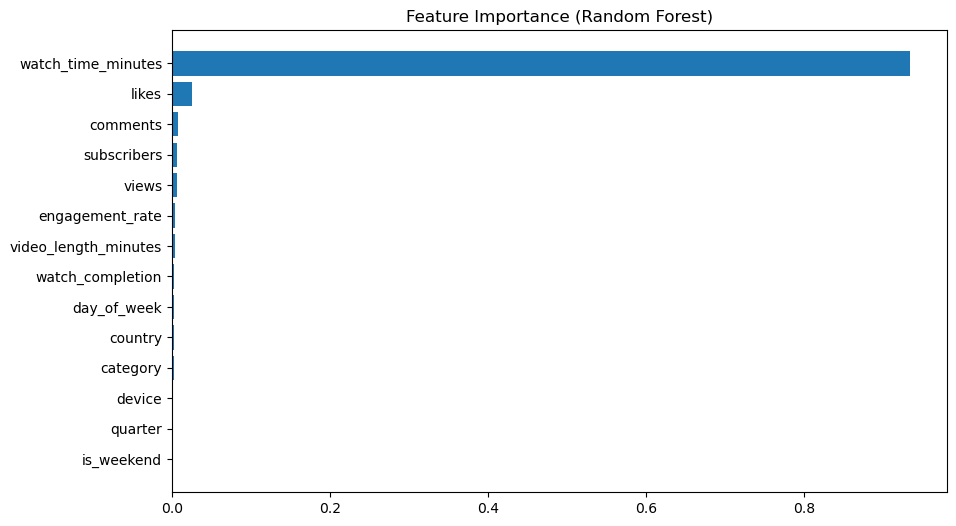

In [24]:
# Train a RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_scaled.columns

# Create DataFrame for ranking
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_imp_df)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df["Feature"], feat_imp_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)")
plt.show()


Using a random sample of 10000 rows for training.
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Training Performance:
R2 Score: 0.9522
MSE: 187.0779
RMSE: 13.6776

Testing Performance:
R2 Score: 0.9438
MSE: 209.3097
RMSE: 14.4675

Best parameters: {'regressor__fit_intercept': True, 'regressor__positive': True}
Best CV score: 0.9522


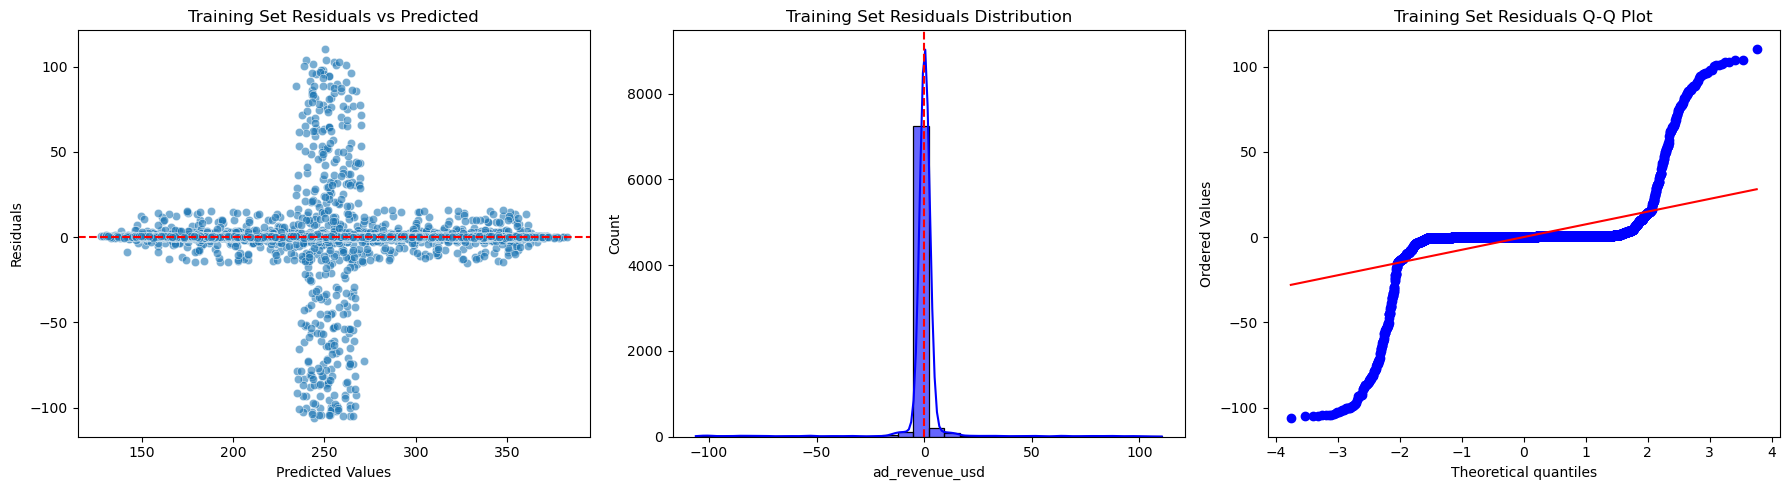

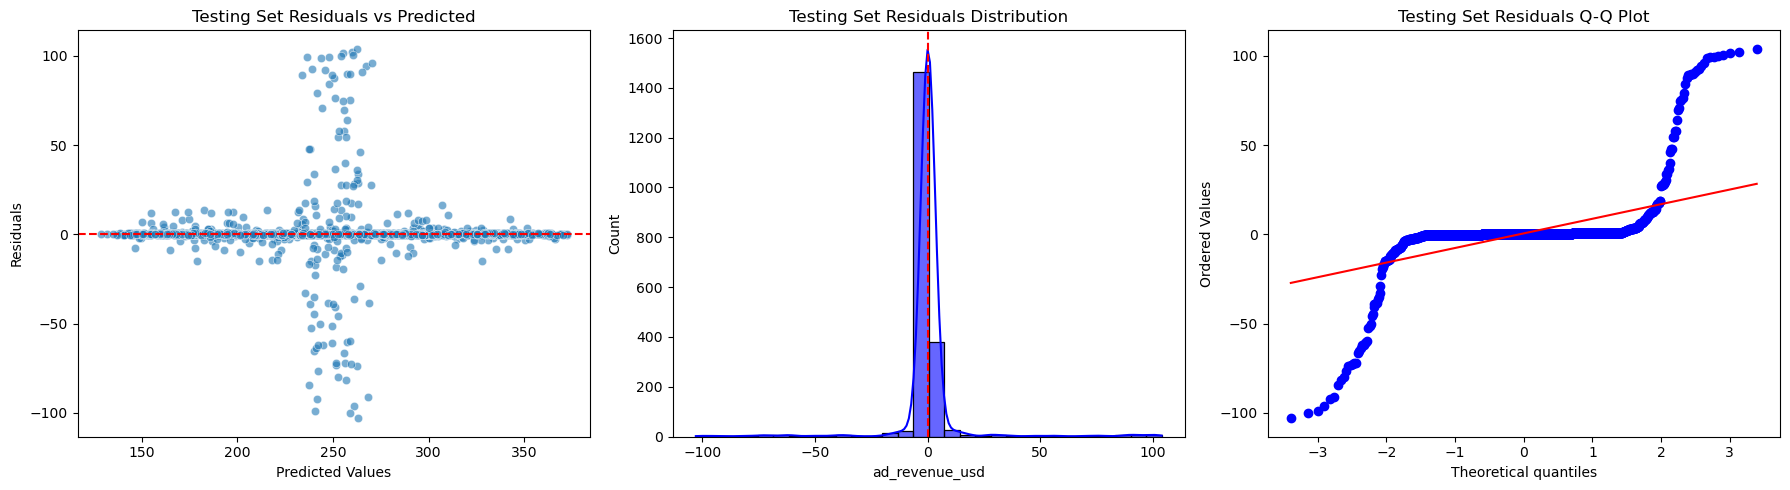

Model saved to: D:\Content_Monetization\Models\linear_regression_pipeline_sample.pkl


In [25]:
# -----------------------------
# Encoding + Scaling Function
# -----------------------------
def encode_and_scale(df, target='ad_revenue_usd'):
    df = df.copy()
    cat_cols = ['category', 'device', 'country']

    # Compute frequency maps for categorical columns and encode
    freq_maps = {}
    for col in cat_cols:
        freq_map = df[col].value_counts().to_dict()
        freq_maps[col] = freq_map
        df[col] = df[col].map(freq_map)

    X = df.drop(columns=[target])
    y = df[target]

    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

    return X_scaled, y, scaler, freq_maps

# -----------------------------
# Linear Regression Training and Evaluation
# -----------------------------
def train_and_evaluate_lr(file_path, target='ad_revenue_usd', sample_size=10000, test_size=0.2, random_state=42):
    # Load dataset
    df = pd.read_csv(file_path)

    # Use random sample if dataset is large
    if sample_size and sample_size < len(df):
        df = df.sample(n=sample_size, random_state=random_state)
        print(f"Using a random sample of {sample_size} rows for training.")

    # Encode categorical features and scale numeric features
    X, y, scaler, freq_maps = encode_and_scale(df, target=target)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)

    # Setup pipeline - your scaler applied outside, so pipeline contains only regressor
    pipeline = Pipeline([
        ('regressor', LinearRegression())
    ])

    # Define grid of hyperparameters for GridSearchCV
    param_grid = {
        'regressor__fit_intercept': [True, False],
        'regressor__positive': [True, False]
    }

    # Setup GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=2
    )

    # Train the model
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    # Predict on train and test sets
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Calculate metrics
    results = {
        'train': {
            'R2': r2_score(y_train, y_train_pred),
            'MSE': mean_squared_error(y_train, y_train_pred),
            'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
        },
        'test': {
            'R2': r2_score(y_test, y_test_pred),
            'MSE': mean_squared_error(y_test, y_test_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))
        },
        'best_params': grid_search.best_params_,
        'best_cv_score': grid_search.best_score_,
    }

    # Residual Analysis Plot
    def plot_residuals(y_true, y_pred, dataset_name):
        residuals = y_true - y_pred
        fig, axes = plt.subplots(1, 3, figsize=(18,5))

        sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=axes[0])
        axes[0].axhline(0, color='red', ls='--')
        axes[0].set_xlabel('Predicted Values')
        axes[0].set_ylabel('Residuals')
        axes[0].set_title(f'{dataset_name} Residuals vs Predicted')

        sns.histplot(residuals, bins=30, kde=True, ax=axes[1], color='blue', alpha=0.6)
        axes[1].axvline(0, color='red', ls='--')
        axes[1].set_title(f'{dataset_name} Residuals Distribution')

        stats.probplot(residuals, dist='norm', plot=axes[2])
        axes[2].set_title(f'{dataset_name} Residuals Q-Q Plot')

        plt.tight_layout()
        plt.show()

    # Print performance metrics
    print("\nTraining Performance:")
    print(f"R2 Score: {results['train']['R2']:.4f}")
    print(f"MSE: {results['train']['MSE']:.4f}")
    print(f"RMSE: {results['train']['RMSE']:.4f}")

    print("\nTesting Performance:")
    print(f"R2 Score: {results['test']['R2']:.4f}")
    print(f"MSE: {results['test']['MSE']:.4f}")
    print(f"RMSE: {results['test']['RMSE']:.4f}")

    print(f"\nBest parameters: {results['best_params']}")
    print(f"Best CV score: {results['best_cv_score']:.4f}")

    # Plot residuals
    plot_residuals(y_train, y_train_pred, "Training Set")
    plot_residuals(y_test, y_test_pred, "Testing Set")

    # Save scaler and freq maps for inference
    os.makedirs("Models", exist_ok=True)
    with open("Models/scaler.pkl", "wb") as f:
        pickle.dump(scaler, f)
    
    with open("Models/freq_maps.json", "w") as f:
        json.dump(freq_maps, f)

    return best_model, results, scaler, freq_maps

# -----------------------------
# Example usage
# -----------------------------
file_path = r"D:\Content_Monetization\cleaned_data.csv"

best_model, metrics, scaler, freq_maps = train_and_evaluate_lr(
    file_path=file_path,
    sample_size=10000,
    test_size=0.2,
    random_state=42
)

# Save trained model pipeline
model_path = r"D:\Content_Monetization\Models\linear_regression_pipeline_sample.pkl"
with open(model_path, "wb") as f:
    pickle.dump(best_model, f)

print(f"Model saved to: {model_path}")


In [26]:
df = pd.read_csv(file_path)
print("Columns in CSV:", list(df.columns))

Columns in CSV: ['views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'category', 'device', 'country', 'ad_revenue_usd', 'engagement_rate', 'watch_completion', 'day_of_week', 'is_weekend', 'quarter']


Using a random sample of 10000 rows for faster training.
Fitting 3 folds for each of 54 candidates, totalling 162 fits

Training Performance:
R² Score (Train): 0.9521
MSE (Train): 187.2388
RMSE (Train): 13.6835

Testing Performance:
R² Score (Test): 0.9439
MSE (Test): 209.0329
RMSE (Test): 14.4580

Best SVR Parameters: {'C': 0.1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV R² Score: 0.9522


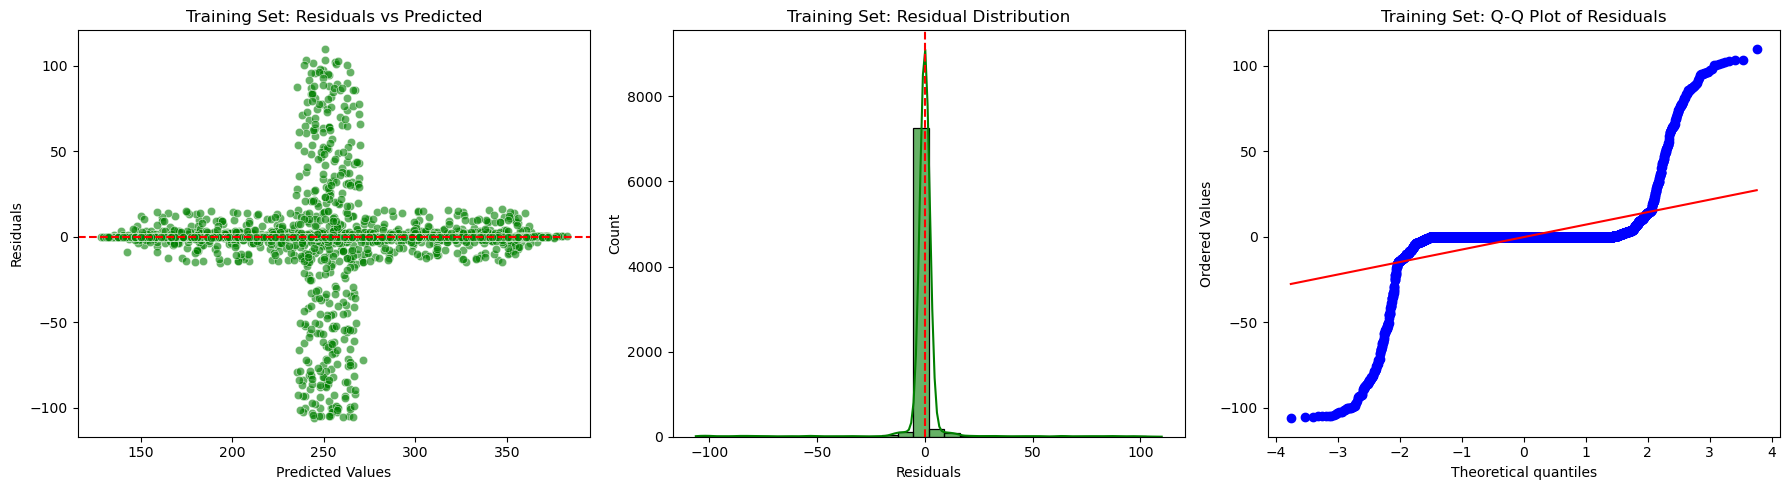

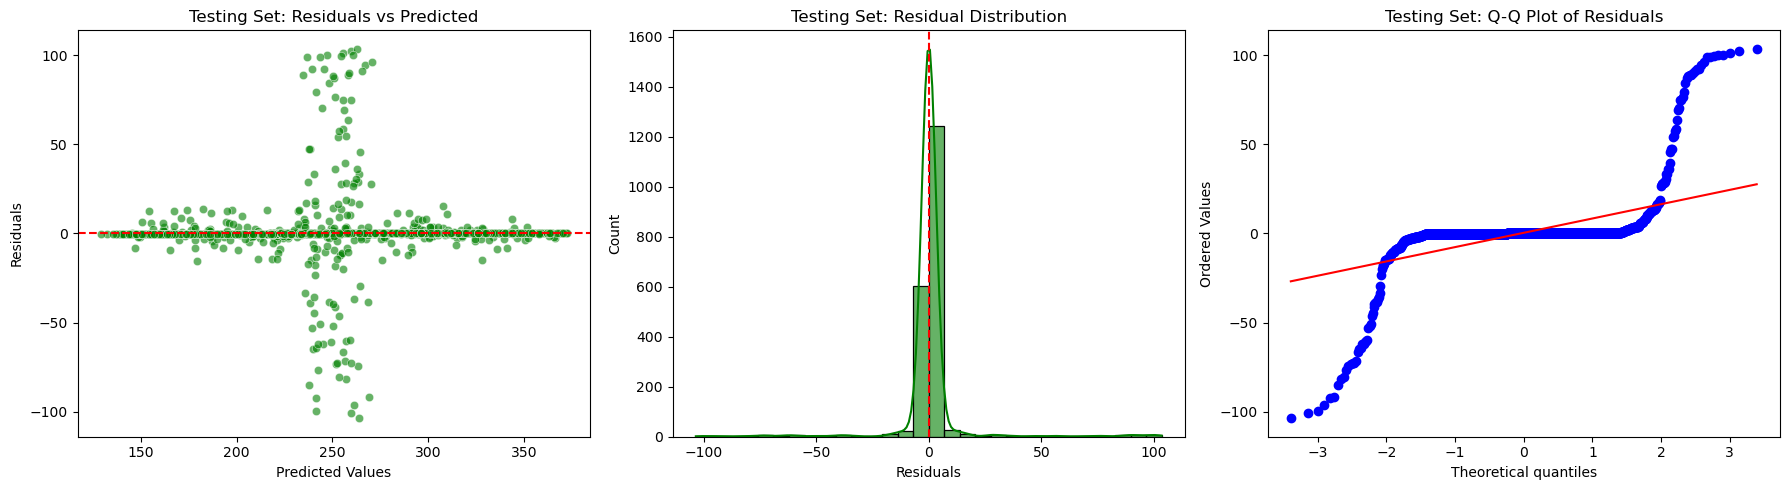

SVR Model saved successfully at: D:\Content_Monetization\Models\svr_model_sample.pkl


In [27]:
# -----------------------------
# Encode categorical variables and scale numerical features
# -----------------------------
def encode_and_scale(df, target="ad_revenue_usd"):
    df = df.copy()

    cat_cols = ["category", "device", "country"]

    # Create frequency maps, encode categorical columns
    freq_maps = {}
    for col in cat_cols:
        freq_map = df[col].value_counts().to_dict()
        freq_maps[col] = freq_map
        df[col] = df[col].map(freq_map)

    X = df.drop(columns=[target])
    y = df[target]

    scaler = StandardScaler()
    X_scaled = pd.DataFrame(
        scaler.fit_transform(X),
        columns=X.columns,
        index=X.index
    )

    return X_scaled, y, scaler, freq_maps


# -----------------------------
# SVR Training Function with GridSearch and Residual Analysis
# -----------------------------
def train_and_evaluate_svr_sample(file_path, target_column="ad_revenue_usd", test_size=0.2, sample_size=10000, random_state=42):
    # Load dataset
    df = pd.read_csv(file_path)

    # Take sample
    if sample_size and sample_size < len(df):
        df = df.sample(n=sample_size, random_state=random_state)
        print(f"Using a random sample of {sample_size} rows for faster training.")

    # Encode + Scale
    X, y, scaler, freq_maps = encode_and_scale(df, target=target_column)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Define SVR model
    svr = SVR()

    # GridSearch parameters
    param_grid = {
        "kernel": ["linear", "rbf", "poly"],
        "C": [0.1, 1, 10],
        "gamma": ["scale", "auto"],
        "epsilon": [0.1, 0.2, 0.5]
    }

    grid_search = GridSearchCV(
        svr,
        param_grid,
        cv=3,
        scoring="r2",
        n_jobs=-1,
        verbose=2
    )

    # Fit model
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_cv_score = grid_search.best_score_

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Compute metrics
    results = {
        "train": {
            "R2": r2_score(y_train, y_train_pred),
            "MSE": mean_squared_error(y_train, y_train_pred),
            "RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred))
        },
        "test": {
            "R2": r2_score(y_test, y_test_pred),
            "MSE": mean_squared_error(y_test, y_test_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred))
        },
        "best_params": best_params,
        "best_cv_score": best_cv_score
    }

    # Residual Analysis
    def plot_residuals(y_true, y_pred, dataset_name="Dataset", color="green"):
        residuals = y_true - y_pred
        fig, axes = plt.subplots(1, 3, figsize=(18,5))

        sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color=color, ax=axes[0])
        axes[0].axhline(0, color="red", linestyle="--")
        axes[0].set_xlabel("Predicted Values")
        axes[0].set_ylabel("Residuals")
        axes[0].set_title(f"{dataset_name}: Residuals vs Predicted")

        sns.histplot(residuals, bins=30, kde=True, color=color, alpha=0.6, ax=axes[1])
        axes[1].axvline(0, color="red", linestyle="--")
        axes[1].set_xlabel("Residuals")
        axes[1].set_title(f"{dataset_name}: Residual Distribution")

        stats.probplot(residuals, dist="norm", plot=axes[2])
        axes[2].set_title(f"{dataset_name}: Q-Q Plot of Residuals")

        plt.tight_layout()
        plt.show()

    # Print metrics
    print("\nTraining Performance:")
    print(f"R² Score (Train): {results['train']['R2']:.4f}")
    print(f"MSE (Train): {results['train']['MSE']:.4f}")
    print(f"RMSE (Train): {results['train']['RMSE']:.4f}")

    print("\nTesting Performance:")
    print(f"R² Score (Test): {results['test']['R2']:.4f}")
    print(f"MSE (Test): {results['test']['MSE']:.4f}")
    print(f"RMSE (Test): {results['test']['RMSE']:.4f}")

    print("\nBest SVR Parameters:", best_params)
    print(f"Best CV R² Score: {best_cv_score:.4f}")

    # Plot residuals
    plot_residuals(y_train, y_train_pred, "Training Set")
    plot_residuals(y_test, y_test_pred, "Testing Set")

    # Save scaler and frequency maps
    os.makedirs("Models", exist_ok=True)
    with open("Models/scaler.pkl", "wb") as f:
        pickle.dump(scaler, f)
    with open("Models/freq_maps.json", "w") as f:
        json.dump(freq_maps, f)

    return best_model, results, X_train, X_test, y_train, y_test, scaler, freq_maps


# -----------------------------
# Example usage
# -----------------------------
file_path = r"D:\Content_Monetization\cleaned_data.csv"

svr_model, svr_metrics, X_train, X_test, y_train, y_test, scaler, freq_maps = train_and_evaluate_svr_sample(
    file_path=file_path
)

# Save the trained SVR model
model_path = r"D:\Content_Monetization\Models\svr_model_sample.pkl"
with open(model_path, "wb") as f:
    pickle.dump(svr_model, f)

print(f"SVR Model saved successfully at: {model_path}")


Using a random sample of 10000 rows for training.
Fitting 3 folds for each of 108 candidates, totalling 324 fits

Training Performance:
R² Score (Train): 0.9429
MSE (Train): 223.2268
RMSE (Train): 14.9408

Testing Performance:
R² Score (Test): 0.9298
MSE (Test): 261.4313
RMSE (Test): 16.1688

Best Decision Tree Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV R² Score: 0.9397


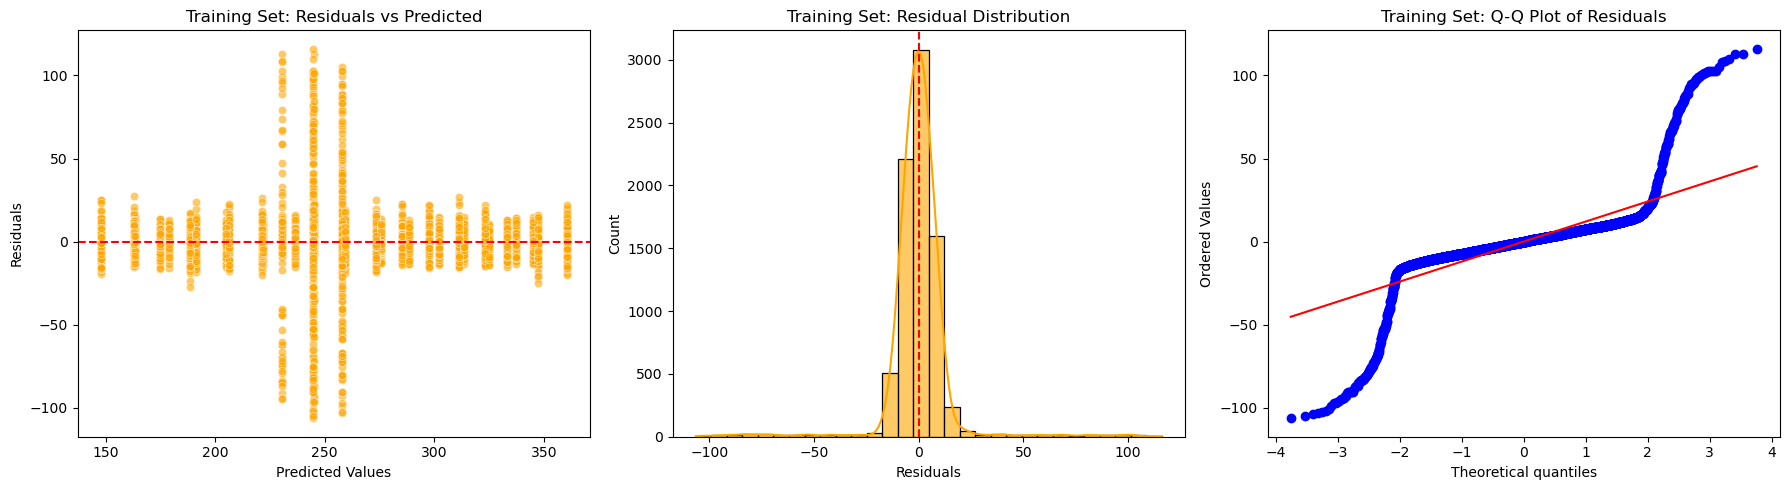

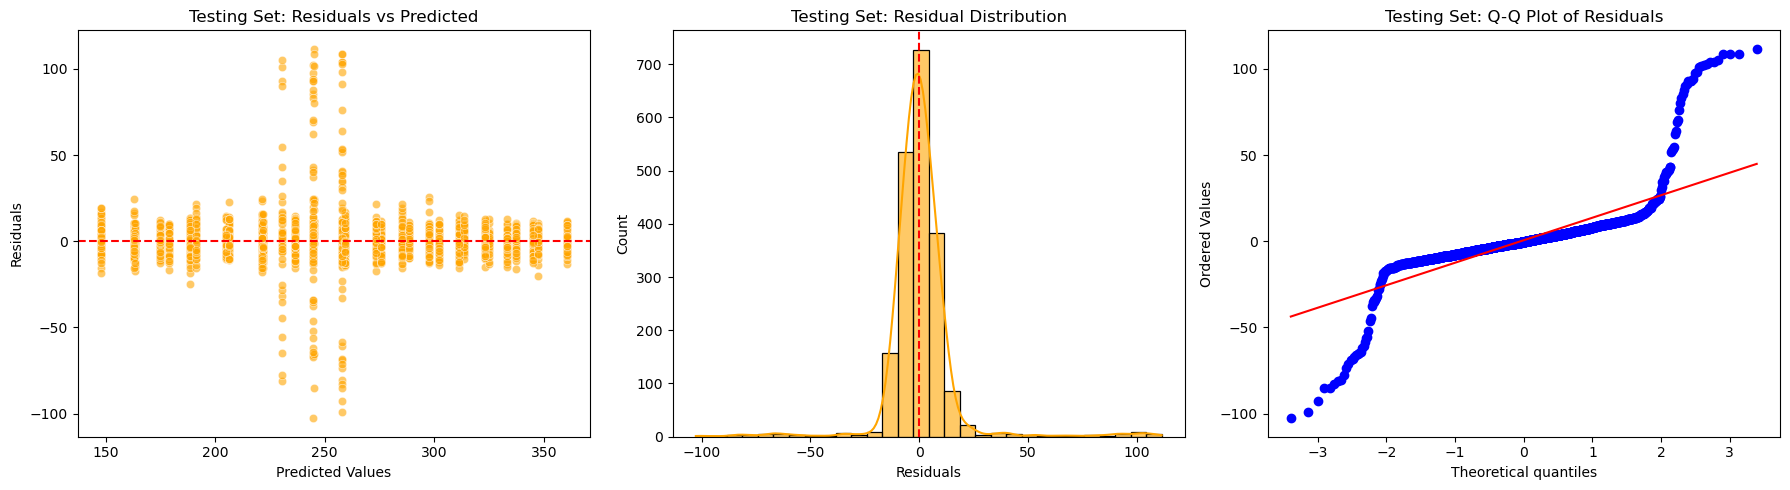

Decision Tree Model saved successfully at: D:\Content_Monetization\Models\decision_tree_model_sample.pkl


In [28]:
# -----------------------------
# Encoding + Scaling Function
# -----------------------------
def encode_and_scale(df, target='ad_revenue_usd'):
    df = df.copy()
    cat_cols = ['category', 'device', 'country']

    # Create frequency maps and encode categorical columns
    freq_maps = {}
    for col in cat_cols:
        freq_map = df[col].value_counts().to_dict()
        freq_maps[col] = freq_map
        df[col] = df[col].map(freq_map)

    X = df.drop(columns=[target])
    y = df[target]

    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

    return X_scaled, y, scaler, freq_maps


# -----------------------------
# Decision Tree Training and Evaluation
# -----------------------------
def train_and_evaluate_dt_sample(file_path, target_column='ad_revenue_usd', test_size=0.2, sample_size=10000, random_state=42):
    # Load dataset
    df = pd.read_csv(file_path)

    # Sample the dataset
    if sample_size and sample_size < len(df):
        df = df.sample(n=sample_size, random_state=random_state)
        print(f"Using a random sample of {sample_size} rows for training.")

    # Encode and scale
    X, y, scaler, freq_maps = encode_and_scale(df, target=target_column)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Decision Tree model
    dt = DecisionTreeRegressor(random_state=random_state)

    # Grid search parameters
    param_grid = {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    }

    grid_search = GridSearchCV(
        dt,
        param_grid,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=2
    )

    # Fit model
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_cv_score = grid_search.best_score_

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Metrics
    results = {
        'train': {
            'R2': r2_score(y_train, y_train_pred),
            'MSE': mean_squared_error(y_train, y_train_pred),
            'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
        },
        'test': {
            'R2': r2_score(y_test, y_test_pred),
            'MSE': mean_squared_error(y_test, y_test_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))
        },
        'best_params': best_params,
        'best_cv_score': best_cv_score
    }

    # Residual Analysis
    def plot_residuals(y_true, y_pred, dataset_name='Dataset', color='orange'):
        residuals = y_true - y_pred
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color=color, ax=axes[0])
        axes[0].axhline(0, color='red', linestyle='--')
        axes[0].set_xlabel('Predicted Values')
        axes[0].set_ylabel('Residuals')
        axes[0].set_title(f'{dataset_name}: Residuals vs Predicted')

        sns.histplot(residuals, bins=30, kde=True, color=color, alpha=0.6, ax=axes[1])
        axes[1].axvline(0, color='red', linestyle='--')
        axes[1].set_xlabel('Residuals')
        axes[1].set_title(f'{dataset_name}: Residual Distribution')

        stats.probplot(residuals, dist='norm', plot=axes[2])
        axes[2].set_title(f'{dataset_name}: Q-Q Plot of Residuals')

        plt.tight_layout()
        plt.show()

    # Print metrics
    print("\nTraining Performance:")
    print(f"R² Score (Train): {results['train']['R2']:.4f}")
    print(f"MSE (Train): {results['train']['MSE']:.4f}")
    print(f"RMSE (Train): {results['train']['RMSE']:.4f}")

    print("\nTesting Performance:")
    print(f"R² Score (Test): {results['test']['R2']:.4f}")
    print(f"MSE (Test): {results['test']['MSE']:.4f}")
    print(f"RMSE (Test): {results['test']['RMSE']:.4f}")

    print(f"\nBest Decision Tree Parameters: {best_params}")
    print(f"Best CV R² Score: {best_cv_score:.4f}")

    # Plot residuals
    plot_residuals(y_train, y_train_pred, 'Training Set')
    plot_residuals(y_test, y_test_pred, 'Testing Set')

    # Save scaler and frequency maps for app use
    os.makedirs('Models', exist_ok=True)
    with open('Models/scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    with open('Models/freq_maps.json', 'w') as f:
        json.dump(freq_maps, f)

    return best_model, results, X_train, X_test, y_train, y_test, scaler, freq_maps

# -----------------------------
# Example Usage
# -----------------------------
file_path = r"D:\Content_Monetization\cleaned_data.csv"

dt_model, dt_metrics, X_train, X_test, y_train, y_test, scaler, freq_maps = train_and_evaluate_dt_sample(
    file_path=file_path
)

# Save the trained Decision Tree model
model_path = r"D:\Content_Monetization\Models\decision_tree_model_sample.pkl"
with open(model_path, 'wb') as f:
    pickle.dump(dt_model, f)

print(f"Decision Tree Model saved successfully at: {model_path}")


Using a random sample of 10000 rows for training.
Fitting 3 folds for each of 48 candidates, totalling 144 fits

Training Performance:
R² Score (Train): 0.9914
MSE (Train): 33.4766
RMSE (Train): 5.7859

Testing Performance:
R² Score (Test): 0.9345
MSE (Test): 243.7498
RMSE (Test): 15.6125

Best Random Forest Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV R² Score: 0.9418


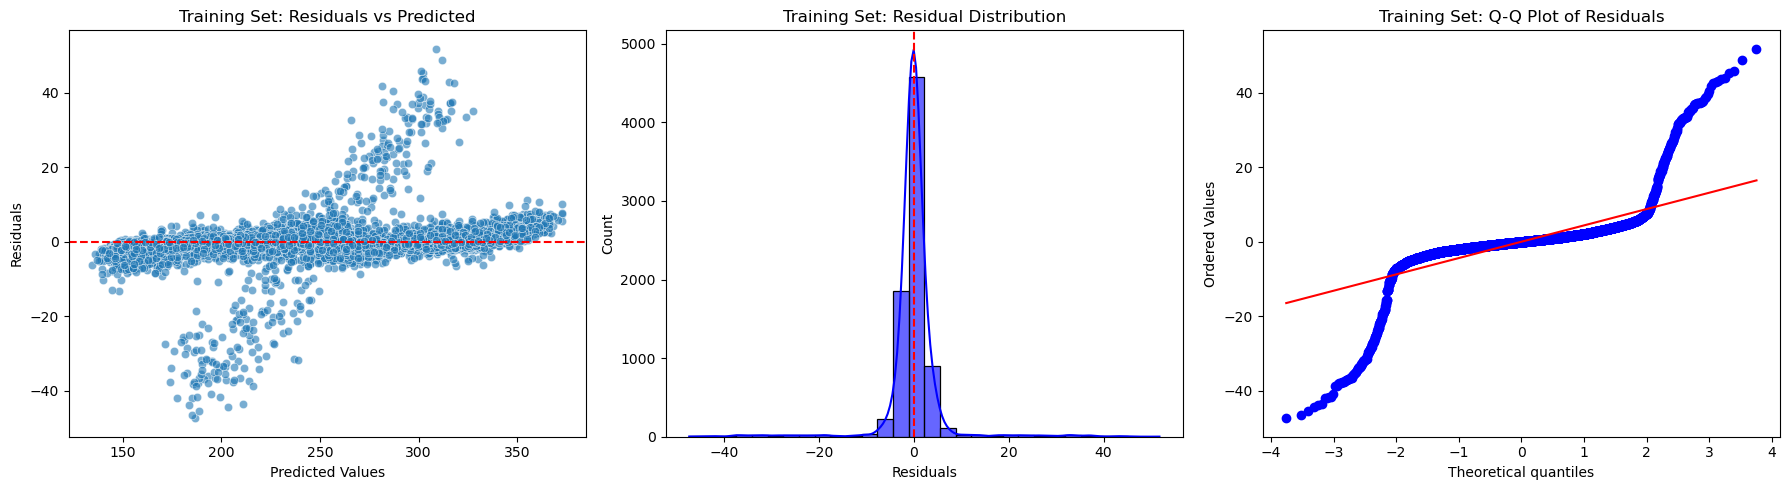

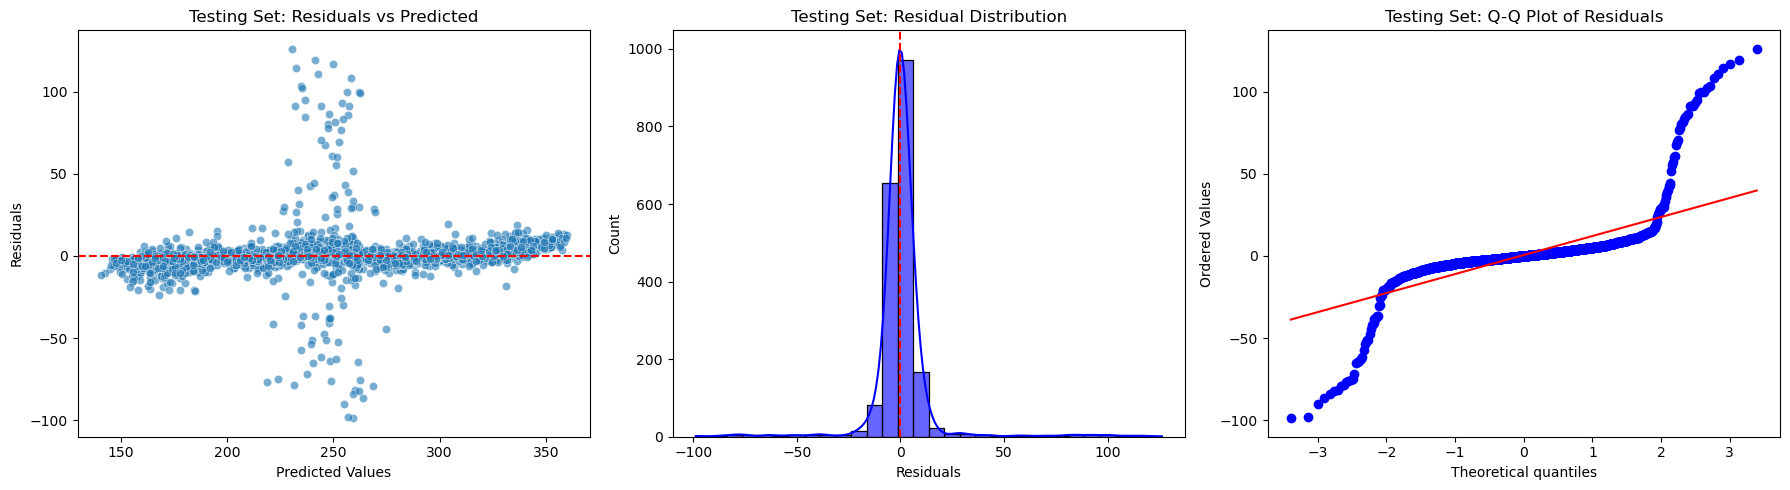

Random Forest Model saved successfully at: D:\Content_Monetization\Models\random_forest_model_sample.pkl


In [29]:
# -----------------------------
# Encoding + Scaling Function
# -----------------------------
def encode_and_scale(df, target='ad_revenue_usd'):
    df = df.copy()
    cat_cols = ['category', 'device', 'country']

    # Compute frequency maps and encode categorical columns
    freq_maps = {}
    for col in cat_cols:
        freq_map = df[col].value_counts().to_dict()
        freq_maps[col] = freq_map
        df[col] = df[col].map(freq_map)

    X = df.drop(columns=[target])
    y = df[target]

    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

    return X_scaled, y, scaler, freq_maps


# -----------------------------
# Random Forest Training Function
# -----------------------------
def train_and_evaluate_rf_sample(file_path, target_column='ad_revenue_usd', test_size=0.2, sample_size=10000, random_state=42):
    # Load dataset
    df = pd.read_csv(file_path)

    # Sample dataset for faster training
    if sample_size and sample_size < len(df):
        df = df.sample(n=sample_size, random_state=random_state)
        print(f"Using a random sample of {sample_size} rows for training.")

    # Encode and scale features
    X, y, scaler, freq_maps = encode_and_scale(df, target=target_column)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize Random Forest Regressor
    rf = RandomForestRegressor(random_state=random_state)

    # Define hyperparameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['auto', 'sqrt']
    }

    # Setup GridSearchCV
    grid_search = GridSearchCV(
        rf,
        param_grid,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=2
    )

    # Fit model
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_cv_score = grid_search.best_score_

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Metrics
    results = {
        'train': {
            'R2': r2_score(y_train, y_train_pred),
            'MSE': mean_squared_error(y_train, y_train_pred),
            'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
        },
        'test': {
            'R2': r2_score(y_test, y_test_pred),
            'MSE': mean_squared_error(y_test, y_test_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))
        },
        'best_params': best_params,
        'best_cv_score': best_cv_score
    }

    # Residual Analysis
    def plot_residuals(y_true, y_pred, dataset_name='Dataset'):
        residuals = y_true - y_pred
        fig, axes = plt.subplots(1, 3, figsize=(18,5))

        sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=axes[0])
        axes[0].axhline(0, color='red', linestyle='--')
        axes[0].set_xlabel('Predicted Values')
        axes[0].set_ylabel('Residuals')
        axes[0].set_title(f'{dataset_name}: Residuals vs Predicted')

        sns.histplot(residuals, bins=30, kde=True, ax=axes[1], color='blue', alpha=0.6)
        axes[1].axvline(0, color='red', linestyle='--')
        axes[1].set_xlabel('Residuals')
        axes[1].set_title(f'{dataset_name}: Residual Distribution')

        stats.probplot(residuals, dist='norm', plot=axes[2])
        axes[2].set_title(f'{dataset_name}: Q-Q Plot of Residuals')

        plt.tight_layout()
        plt.show()

    # Print metrics
    print("\nTraining Performance:")
    print(f"R² Score (Train): {results['train']['R2']:.4f}")
    print(f"MSE (Train): {results['train']['MSE']:.4f}")
    print(f"RMSE (Train): {results['train']['RMSE']:.4f}")

    print("\nTesting Performance:")
    print(f"R² Score (Test): {results['test']['R2']:.4f}")
    print(f"MSE (Test): {results['test']['MSE']:.4f}")
    print(f"RMSE (Test): {results['test']['RMSE']:.4f}")

    print(f"\nBest Random Forest Parameters: {best_params}")
    print(f"Best CV R² Score: {best_cv_score:.4f}")

    # Plot residuals
    plot_residuals(y_train, y_train_pred, 'Training Set')
    plot_residuals(y_test, y_test_pred, 'Testing Set')

    # Save scaler and frequency maps
    os.makedirs('Models', exist_ok=True)
    with open('Models/scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    with open('Models/freq_maps.json', 'w') as f:
        json.dump(freq_maps, f)

    return best_model, results, X_train, X_test, y_train, y_test, scaler, freq_maps

# -----------------------------
# Example Usage
# -----------------------------
file_path = r"D:\Content_Monetization\cleaned_data.csv"

rf_model, rf_metrics, X_train, X_test, y_train, y_test, scaler, freq_maps = train_and_evaluate_rf_sample(
    file_path=file_path
)

# Save trained Random Forest model
model_path = r"D:\Content_Monetization\Models\random_forest_model_sample.pkl"
with open(model_path, 'wb') as f:
    pickle.dump(rf_model, f)

print(f"Random Forest Model saved successfully at: {model_path}")


Using a random sample of 10000 rows for training.
Fitting 3 folds for each of 48 candidates, totalling 144 fits

Training Performance:
R² Score (Train): 0.9548
MSE (Train): 176.9798
RMSE (Train): 13.3034

Testing Performance:
R² Score (Test): 0.9409
MSE (Test): 220.1666
RMSE (Test): 14.8380

Best XGBoost Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Best CV R² Score: 0.9508


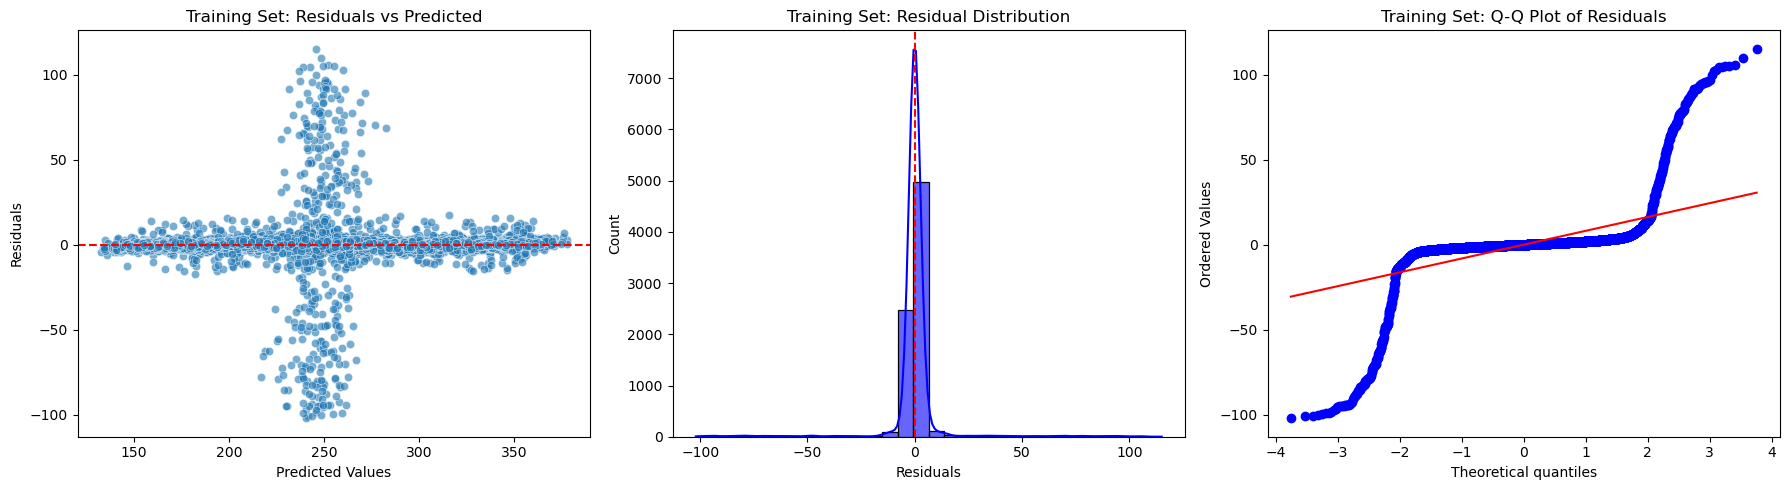

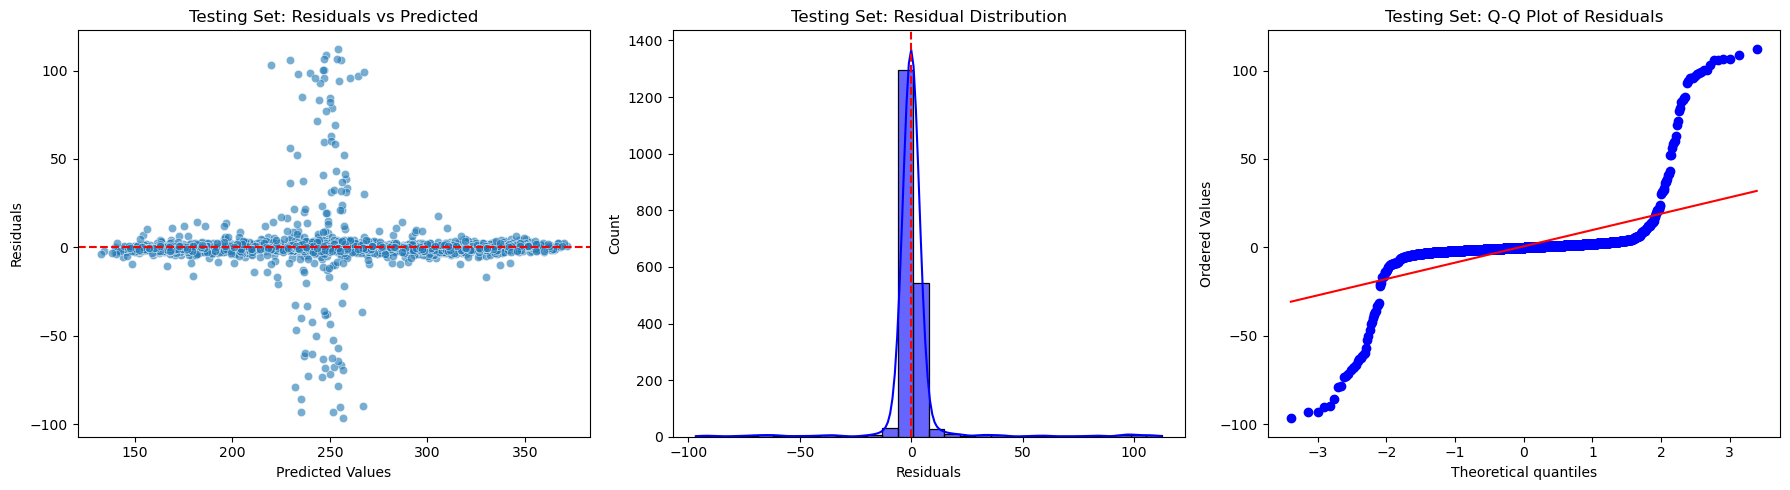

XGBoost Model saved successfully at: D:\Content_Monetization\Models\xgboost_model_sample.pkl


In [30]:
# -----------------------------
# Encoding + Scaling Function
# -----------------------------
def encode_and_scale(df, target='ad_revenue_usd'):
    df = df.copy()
    cat_cols = ['category', 'device', 'country']

    # Create frequency maps and encode categorical columns
    freq_maps = {}
    for col in cat_cols:
        freq_map = df[col].value_counts().to_dict()
        freq_maps[col] = freq_map
        df[col] = df[col].map(freq_map)

    X = df.drop(columns=[target])
    y = df[target]

    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

    return X_scaled, y, scaler, freq_maps

# -----------------------------
# XGBoost Training Function
# -----------------------------
def train_and_evaluate_xgb_sample(file_path, target_column='ad_revenue_usd', test_size=0.2, sample_size=10000, random_state=42):
    # Load dataset
    df = pd.read_csv(file_path)

    # Sample dataset for quicker training
    if sample_size and sample_size < len(df):
        df = df.sample(n=sample_size, random_state=random_state)
        print(f"Using a random sample of {sample_size} rows for training.")

    # Encode and scale
    X, y, scaler, freq_maps = encode_and_scale(df, target=target_column)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)

    # Initialize XGBoost regressor
    xgb = XGBRegressor(random_state=random_state, verbosity=0)

    # Define hyperparameters grid for tuning
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1],
        'colsample_bytree': [0.8, 1]
    }

    grid_search = GridSearchCV(
        xgb,
        param_grid,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=2
    )

    # Fit model
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_cv_score = grid_search.best_score_

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Metrics
    results = {
        'train': {
            'R2': r2_score(y_train, y_train_pred),
            'MSE': mean_squared_error(y_train, y_train_pred),
            'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
        },
        'test': {
            'R2': r2_score(y_test, y_test_pred),
            'MSE': mean_squared_error(y_test, y_test_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))
        },
        'best_params': best_params,
        'best_cv_score': best_cv_score
    }

    # Residual analysis function
    def plot_residuals(y_true, y_pred, dataset_name='Dataset'):
        residuals = y_true - y_pred
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=axes[0])
        axes[0].axhline(0, color='red', linestyle='--')
        axes[0].set_xlabel('Predicted Values')
        axes[0].set_ylabel('Residuals')
        axes[0].set_title(f'{dataset_name}: Residuals vs Predicted')

        sns.histplot(residuals, bins=30, kde=True, ax=axes[1], color='blue', alpha=0.6)
        axes[1].axvline(0, color='red', linestyle='--')
        axes[1].set_xlabel('Residuals')
        axes[1].set_title(f'{dataset_name}: Residual Distribution')

        stats.probplot(residuals, dist='norm', plot=axes[2])
        axes[2].set_title(f'{dataset_name}: Q-Q Plot of Residuals')

        plt.tight_layout()
        plt.show()

    # Print metrics
    print("\nTraining Performance:")
    print(f"R² Score (Train): {results['train']['R2']:.4f}")
    print(f"MSE (Train): {results['train']['MSE']:.4f}")
    print(f"RMSE (Train): {results['train']['RMSE']:.4f}")

    print("\nTesting Performance:")
    print(f"R² Score (Test): {results['test']['R2']:.4f}")
    print(f"MSE (Test): {results['test']['MSE']:.4f}")
    print(f"RMSE (Test): {results['test']['RMSE']:.4f}")

    print(f"\nBest XGBoost Parameters: {best_params}")
    print(f"Best CV R² Score: {best_cv_score:.4f}")

    # Plot residuals
    plot_residuals(y_train, y_train_pred, 'Training Set')
    plot_residuals(y_test, y_test_pred, 'Testing Set')

    # Save scaler and freq maps
    os.makedirs('Models', exist_ok=True)
    with open('Models/scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    with open('Models/freq_maps.json', 'w') as f:
        json.dump(freq_maps, f)

    return best_model, results, X_train, X_test, y_train, y_test, scaler, freq_maps

# -----------------------------
# Example Usage
# -----------------------------
file_path = r"D:\Content_Monetization\cleaned_data.csv"

xgb_model, xgb_metrics, X_train, X_test, y_train, y_test, scaler, freq_maps = train_and_evaluate_xgb_sample(
    file_path=file_path
)

# Save trained XGBoost model
model_path = r"D:\Content_Monetization\Models\xgboost_model_sample.pkl"
with open(model_path, 'wb') as f:
    pickle.dump(xgb_model, f)

print(f"XGBoost Model saved successfully at: {model_path}")


In [14]:
# -----------------------------
# Storing the results
# -----------------------------
model_results = {
    "Linear Regression": {
        "Train_R2": 0.9496, "Test_R2": 0.9568,
        "Train_RMSE": 13.9205, "Test_RMSE": 12.7857,
        "Train_MSE": 193.7808, "Test_MSE": 163.4736,
        "CV_R2": 0.9495
    },
    "SVR": {
        "Train_R2": 0.9496, "Test_R2": 0.9567,
        "Train_RMSE": 13.9226, "Test_RMSE": 12.7943,
        "Train_MSE": 193.8382, "Test_MSE": 163.6944,
        "CV_R2": 0.9495
    },
    "Decision Tree": {
        "Train_R2": 0.9408, "Test_R2": 0.9420,
        "Train_RMSE": 15.0886, "Test_RMSE": 14.8101,
        "Train_MSE": 227.6658, "Test_MSE": 219.3379,
        "CV_R2": 0.9381
    },
    "Random Forest": {
        "Train_R2": 0.9746, "Test_R2": 0.9445,
        "Train_RMSE": 9.8867, "Test_RMSE": 14.4897,
        "Train_MSE": 97.7476, "Test_MSE": 209.9522,
        "CV_R2": 0.9370
    },
    "XGBoost": {
        "Train_R2": 0.9519, "Test_R2": 0.9555,
        "Train_RMSE": 13.5941, "Test_RMSE": 12.9704,
        "Train_MSE": 184.7985, "Test_MSE": 168.2303,
        "CV_R2": 0.9484
    }
}

# -----------------------------
# Create DataFrame
# -----------------------------
comparison_df = pd.DataFrame(model_results).T

# Rank models based on Test R² (higher is better) and Test RMSE (lower is better)
comparison_df["R2_Rank"] = comparison_df["Test_R2"].rank(ascending=False)
comparison_df["RMSE_Rank"] = comparison_df["Test_RMSE"].rank(ascending=True)

# Compute an overall score (average rank)
comparison_df["Overall_Rank"] = (comparison_df["R2_Rank"] + comparison_df["RMSE_Rank"]) / 2
best_model = comparison_df.sort_values(by="Overall_Rank").head(1)

# -----------------------------
# Results
# -----------------------------
print("\n Model Comparison:")
print(comparison_df.sort_values(by="Overall_Rank"))

print("\n Best Model Selected:")
print(best_model)



 Model Comparison:
                   Train_R2  Test_R2  Train_RMSE  Test_RMSE  Train_MSE  \
Linear Regression    0.9496   0.9568     13.9205    12.7857   193.7808   
SVR                  0.9496   0.9567     13.9226    12.7943   193.8382   
XGBoost              0.9519   0.9555     13.5941    12.9704   184.7985   
Random Forest        0.9746   0.9445      9.8867    14.4897    97.7476   
Decision Tree        0.9408   0.9420     15.0886    14.8101   227.6658   

                   Test_MSE   CV_R2  R2_Rank  RMSE_Rank  Overall_Rank  
Linear Regression  163.4736  0.9495      1.0        1.0           1.0  
SVR                163.6944  0.9495      2.0        2.0           2.0  
XGBoost            168.2303  0.9484      3.0        3.0           3.0  
Random Forest      209.9522  0.9370      4.0        4.0           4.0  
Decision Tree      219.3379  0.9381      5.0        5.0           5.0  

 Best Model Selected:
                   Train_R2  Test_R2  Train_RMSE  Test_RMSE  Train_MSE  \
Linear